# Load tools

In [1]:
import sys
sys.executable

'/Users/patrickmurphy/mambaforge/envs/jupyterenv/bin/python'

In [2]:
#%pip install gseapy
#%pip install numpy
#%pip install pydot graphviz
#%pip install matplotlib
#%pip install plotnine
#%pip install pandas
#%pip install seaborn
#%pip install scipy
#%pip install networkx

In [3]:
import pandas as pd
from plotnine import ggplot, aes, geom_tile, scale_fill_gradientn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy import stats
import matplotlib.pyplot as plt
import pydot
import gseapy
import networkx as nx
import gseapy
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from gseapy import biomart
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
from gseapy import barplot, dotplot

In [17]:
import warnings

In [56]:
import re

# Load DESeq2 results

In [4]:
# Specify the path to the directory
path = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/*res*txt'

# Use glob to get all the .res files from the directory
files = glob.glob(path)

# Print the files to check if they are being detected
print("Detected Files:", files)

# Initialize an empty string to store the formatted text
formatted_text = ""

# Iterate over each file path
for file in files:
    # Extract the filename without extension to use as variable name
    var_name = os.path.splitext(os.path.basename(file))[0]
    # Format the text
    text = f"{var_name} = pd.read_csv(\"{file}\", sep=\" \")\n"
    # Append to the formatted_text
    formatted_text += text

# Now, formatted_text contains the formatted text for all files
# You can print it to the console
print(formatted_text)

Detected Files: ['/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_KI_v_WT_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpKI_KI_v_WT_res_2v4.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/MusJCI_EC_KO_v_WT_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InvivoCarotid_Lig_WTvKO_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_TNF_KIvWT_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuHBEC_SI_v_WT_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpECKO_KO_v_WT_res_6v6.txt', '/Users/patrickmurphy/Documents/UCONN/4_

In [5]:
InVitroMsBrEC_KI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_KI_v_WT_res.txt", sep=" ")
InVivoMsBrEC_KI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpKI_KI_v_WT_res_2v4.txt", sep=" ")
InvivoCarotid_Lig_WTvKO_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InvivoCarotid_Lig_WTvKO_res.txt", sep=" ")
InVitroMsBrEC_TNF_KIvWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_TNF_KIvWT_res.txt", sep=" ")
InVitroHuHBEC_SI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuHBEC_SI_v_WT_res.txt", sep=" ")
InVivoMsBrEC_KO_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpECKO_KO_v_WT_res_6v6.txt", sep=" ")
InVivoMsBrEC_GrnKI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoGrnKI_KI_v_WT_res_4v2.txt", sep=" ")
InvivoCarotid_Contra_WTvKO_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InvivoCarotid_Contra_WTvKO_res.txt", sep=" ")
InVitroHuBrEC_SI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_SI_v_WT_res.txt", sep=" ")
InVitroMsBrEC_Inner_KIvWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_Inner_KIvWT_res.txt", sep=" ")
InVitroHuBrEC_Inner_siTDP43vWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_Inner_siTDP43vWT_res.txt", sep=" ")
InVitroMsBrEC_K0_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_K0_v_WT_res.txt", sep=" ")
InVitroHuBrEC_TNF_siTDP43vWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_TNF_siTDP43vWT_res.txt", sep=" ")
InVitroHuBrEC_SI_v_WT_outer_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_SI_v_WT_outer_res.txt", sep=" ")
InVitroHuHUVEC_SI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuHUVEC_SI_v_WT_res.txt", sep=" ")
InVitroMsBrEC_Outer_KIvWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_Outer_KIvWT_res.txt", sep=" ")
InVivoNuclei_Clust1v3_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/Capillary_c1v3.csv")
InVivoMsEC_KO_vs_WT_JCIinsight_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/MusJCI_EC_KO_v_WT_res.txt", sep=" ")


In [6]:
#Invert sign of carotid data (they are run with WT v KO)

# Columns to invert
columns_to_invert = ['log2FoldChange', 'stat']  # Add other column names as needed

# Inverting the sign
InvivoCarotid_Lig_WTvKO_res[columns_to_invert] = InvivoCarotid_Lig_WTvKO_res[columns_to_invert] * -1
InvivoCarotid_Contra_WTvKO_res[columns_to_invert] = InvivoCarotid_Contra_WTvKO_res[columns_to_invert] * -1

# Load data for base mean (filtering for GSEA)

Processed InVitroMsBrEC_KI_v_WT_res: 27687 values
Processed InvivoCarotid_Lig_WTvKO_res: 14871 values
Processed InVitroMsBrEC_TNF_KIvWT_res: 24376 values
Processed InVitroHuHBEC_SI_v_WT_res: 28609 values
Processed InvivoCarotid_Contra_WTvKO_res: 14472 values
Processed InVitroHuBrEC_SI_v_WT_res: 31874 values
Processed InVitroMsBrEC_Inner_KIvWT_res: 23866 values
Processed InVitroHuBrEC_Inner_siTDP43vWT_res: 26777 values
Processed InVitroMsBrEC_K0_v_WT_res: 26338 values
Processed InVitroHuBrEC_TNF_siTDP43vWT_res: 27217 values
Processed InVitroHuBrEC_SI_v_WT_outer_res: 27300 values
Processed InVitroHuHUVEC_SI_v_WT_res: 26858 values
Processed InVitroMsBrEC_Outer_KIvWT_res: 24970 values
Processed InVivoMsBrEC_KI_v_WT_res: 21263 values
Processed InVivoMsBrEC_KO_v_WT_res: 24695 values
Processed InVivoMsBrEC_GrnKI_v_WT_res: 21123 values


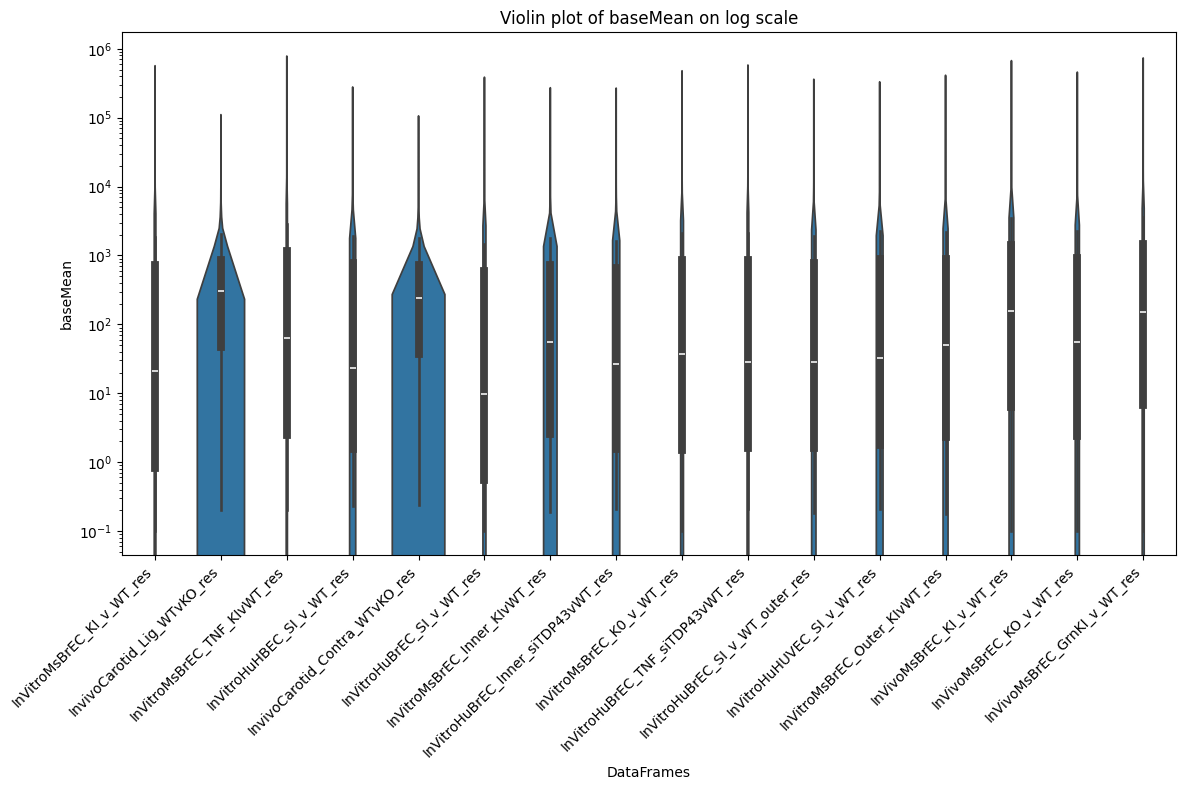

In [7]:
# Original DataFrame names and objects
df_dict = {
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    'InvivoCarotid_Lig_WTvKO_res': InvivoCarotid_Lig_WTvKO_res,
    'InVitroMsBrEC_TNF_KIvWT_res': InVitroMsBrEC_TNF_KIvWT_res,
    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res' : InvivoCarotid_Contra_WTvKO_res, 
    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
    'InVitroMsBrEC_Inner_KIvWT_res' : InVitroMsBrEC_Inner_KIvWT_res,
    'InVitroHuBrEC_Inner_siTDP43vWT_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res,
    'InVitroHuBrEC_TNF_siTDP43vWT_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
    'InVitroMsBrEC_Outer_KIvWT_res' : InVitroMsBrEC_Outer_KIvWT_res,
    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
    'InVivoMsBrEC_GrnKI_v_WT_res' : InVivoMsBrEC_GrnKI_v_WT_res#,
    #'InVivoMsEC_KO_vs_WT_JCIinsight_res' : InVivoMsEC_KO_vs_WT_JCIinsight_res
}

# Extracting baseMean from each DataFrame and replacing 0 with a small number (0.1)
data = []
labels = []
for name, df in df_dict.items():
    if 'baseMean' in df.columns:
        baseMean_values = df['baseMean'].replace(0, np.nan).dropna().apply(lambda x: max(x, 0.1))
        data.append(baseMean_values)
        labels.append(name)
        print(f"Processed {name}: {len(baseMean_values)} values")

# Plotting the violin plot with a log scale
plt.figure(figsize=(12, 8))

# Create a list of all baseMean values along with their corresponding DataFrame name
all_baseMeans = []
all_labels = []
for label, baseMean_values in zip(labels, data):
    all_baseMeans.extend(baseMean_values)
    all_labels.extend([label] * len(baseMean_values))

# Creating a DataFrame for seaborn
plot_data = pd.DataFrame({
    'baseMean': all_baseMeans,
    'DataFrame': all_labels
})

# Plotting
sns.violinplot(x='DataFrame', y='baseMean', data=plot_data)
plt.yscale('log')
plt.title('Violin plot of baseMean on log scale')
plt.xlabel('DataFrames')
plt.ylabel('baseMean')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#Convert DESeq2 mouse to human

In [8]:
from biomart import BiomartServer

# Initialize the Biomart server
server = BiomartServer( "http://www.ensembl.org/biomart" )
server.verbose = True

# Choose the dataset
dataset = server.datasets['mmusculus_gene_ensembl']

# Define the attributes you want to retrieve
attributes = ['external_gene_name', 'hsapiens_homolog_associated_gene_name']

# Query mouse to human mappings
response = dataset.search({
    'attributes': attributes
})

# Create a dictionary for mouse to human gene mappings
m2h_dict = {}

# Process the response line by line
for line in response.iter_lines():
    line = line.decode('utf-8')  # Convert bytes to string if necessary
    row = line.split("\t")
    # Check if any of the required fields is missing
    if len(row) == 2 and None not in row:
        mouse_gene, human_homolog = row
        m2h_dict[mouse_gene] = human_homolog

[BiomartServer:'http://www.ensembl.org/biomart/martservice'] Fetching datasets
[BiomartServer:'http://www.ensembl.org/biomart/martservice'] Fetching databases
[BiomartDatabase:'Ensembl Genes 112'] Fetching datasets
[BiomartDatabase:'Mouse strains 112'] Fetching datasets
[BiomartDatabase:'Sequence'] Fetching datasets
[BiomartDatabase:'Ontology'] Fetching datasets
[BiomartDatabase:'Genomic features 112'] Fetching datasets
[BiomartDatabase:'Ensembl Variation 112'] Fetching datasets
[BiomartDatabase:'Ensembl Regulation 112'] Fetching datasets
[BiomartDataset:'mmusculus_gene_ensembl'] Searching using following params:
{'attributes': ['external_gene_name', 'hsapiens_homolog_associated_gene_name']}
[BiomartDataset:'mmusculus_gene_ensembl'] Fetching attributes
[BiomartDataset] search query:
b'<Query virtualSchemaName="default" formatter="TSV" header="0" uniqueRows="1" datasetConfigVersion="0.6" count=""><Dataset name="mmusculus_gene_ensembl" interface="default"><Attribute name="external_gene_n

In [9]:
# Create a dictionary where keys are names and values are dataframes
df_dict = {
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    'InvivoCarotid_Lig_WTvKO_res': InvivoCarotid_Lig_WTvKO_res,
    'InVitroMsBrEC_TNF_KIvWT_res': InVitroMsBrEC_TNF_KIvWT_res,
#    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res' : InvivoCarotid_Contra_WTvKO_res, 
#    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
    'InVitroMsBrEC_Inner_KIvWT_res' : InVitroMsBrEC_Inner_KIvWT_res,
#    'InVitroHuBrEC_Inner_siTDP43vWT_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res,
#    'InVitroHuBrEC_TNF_siTDP43vWT_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
#    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
#    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
    'InVitroMsBrEC_Outer_KIvWT_res' : InVitroMsBrEC_Outer_KIvWT_res,
    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
    'InVivoMsBrEC_GrnKI_v_WT_res' : InVivoMsBrEC_GrnKI_v_WT_res,
    'InVivoMsEC_KO_vs_WT_JCIinsight_res' : InVivoMsEC_KO_vs_WT_JCIinsight_res
}

def transform_dataframe(df, m2h_dict):
    old_index = df.index
    new_index = old_index.map(m2h_dict)  # map the old index to the new index
    df.index = new_index  # set the new index
    return df

# Apply the function to every dataframe in the dictionary
for df_name in df_dict:
    df = df_dict[df_name]
    transformed_df = transform_dataframe(df, m2h_dict)
    new_var_name = f"{df_name}_HsGeneID"  # appending "_HsGeneID" to the variable name
    globals()[new_var_name] = transformed_df  # save the transformed DataFrame as a new global variable

In [10]:
#Prepare single cell res file so that it is in the same format as others

def reformat_df(combined_df):
    # Create a copy of the DataFrame
    formatted_df = combined_df.copy()

    # Print original columns for debugging
    print("Original columns:", formatted_df.columns.tolist())

    # If DataFrame has a column to be set as index, set it as index
    if '1_names' in formatted_df.columns:
        formatted_df.set_index('1_names', inplace=True)
    
    # Rename columns
    formatted_df.columns = formatted_df.columns.str.replace('1_logfoldchanges', 'log2FoldChange')
    formatted_df.columns = formatted_df.columns.str.replace('1_pvals_adj', 'padj')
    formatted_df.columns = formatted_df.columns.str.replace('1_pvals', 'pvalue')

    # Print new columns for debugging
    print("New columns:", formatted_df.columns.tolist())
    
    return formatted_df

def reformat_and_assign(df_name, df):
    reformatted_df = reformat_df(df)
    globals()[df_name + '_formatted'] = reformatted_df

# Example usage
reformat_and_assign('InVivoNuclei_Clust1v3_res', InVivoNuclei_Clust1v3_res)

Original columns: ['Unnamed: 0', '1_names', '1_scores', '1_logfoldchanges', '1_pvals_adj', '1_pvals']
New columns: ['Unnamed: 0', '1_scores', 'log2FoldChange', 'padj', 'pvalue']


#Prepare X-Y plots for correlation between data from TDP43 KO, KI and KD relative to human brain ECs in vivo with low TDP43

In [464]:
#This will export the top Enrichr terms for transcripts up in both sets, or down in both sets

df_dict_humangene_res = {
    #'InVitroMsBrEC_KI_v_WT_res_HsGeneID': InVitroMsBrEC_KI_v_WT_res_HsGeneID,
    #'InvivoCarotid_Lig_WTvKO_res_HsGeneID': InvivoCarotid_Lig_WTvKO_res_HsGeneID,
    #'InVitroMsBrEC_TNF_KIvWT_res_HsGeneID': InVitroMsBrEC_TNF_KIvWT_res_HsGeneID,
    #'InVitroHuHBEC_SI_v_WT_res': InVitroHuHBEC_SI_v_WT_res,
    #'InvivoCarotid_Contra_WTvKO_res_HsGeneID': InvivoCarotid_Contra_WTvKO_res_HsGeneID, 
    'InVitroHuBrEC_SI_v_WT_res': InVitroHuBrEC_SI_v_WT_res,
    #'InVitroMsBrEC_Inner_KIvWT_res_HsGeneID': InVitroMsBrEC_Inner_KIvWT_res_HsGeneID,
    #'InVitroHuBrEC_SI_v_WT_inner_res': InVitroHuBrEC_Inner_siTDP43vWT_res,
    #'InVitroMsBrEC_K0_v_WT_res_HsGeneID': InVitroMsBrEC_K0_v_WT_res_HsGeneID,
    #'InVitroHuBrEC_SI_v_WT_TNF_res': InVitroHuBrEC_TNF_siTDP43vWT_res,
    #'InVitroHuBrEC_SI_v_WT_outer_res': InVitroHuBrEC_SI_v_WT_outer_res,
    #'InVitroHuHUVEC_SI_v_WT_res': InVitroHuHUVEC_SI_v_WT_res,
    #'InVitroMsBrEC_Outer_KIvWT_res_HsGeneID': InVitroMsBrEC_Outer_KIvWT_res_HsGeneID,
    #'InVivoMsBrEC_KI_v_WT_res_HsGeneID': InVivoMsBrEC_KI_v_WT_res_HsGeneID,
    #'InVivoMsBrEC_KO_v_WT_res_HsGeneID': InVivoMsBrEC_KO_v_WT_res_HsGeneID,
    #'InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID': InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID,
    #'InVivoMsEC_KO_vs_WT_JCIinsight_res_HsGeneID': InVivoMsEC_KO_vs_WT_JCIinsight_res_HsGeneID,
    'InVivoNuclei_Clust1v3_res_format': InVivoNuclei_Clust1v3_res_formatted
}

# Suppress specific FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Function to join, filter, and plot for a single comparison DataFrame
def plot_log2foldchange_comparison(reference_df, compare_df, title, save_dir, compare_name):
    # Rename overlapping columns in reference_df (or compare_df if preferred)
    reference_df = reference_df.rename(
        columns={'pvalue': 'pvalue_ref', 'padj': 'padj_ref', 'log2FoldChange': 'log2FoldChange_ref'}
    )
    compare_df = compare_df.rename(
        columns={'pvalue': 'pvalue_comp', 'padj': 'padj_comp', 'log2FoldChange': 'log2FoldChange_comp'}
    )
    joined_df = reference_df.join(compare_df[['pvalue_comp', 'padj_comp', 'log2FoldChange_comp']], how='outer')

    filtered_df = joined_df.dropna(subset=['log2FoldChange_ref', 'log2FoldChange_comp'])
    filtered_df = filtered_df.rename(columns={'Unnamed: 0': 'gene_id'})
    filtered_df = filtered_df[(filtered_df['padj_ref'] < 0.05)]
    
    log2fold_ref = filtered_df['log2FoldChange_ref']
    log2fold_comp = filtered_df['log2FoldChange_comp']

    # Determine the genes increased in both datasets
    increased_genes = filtered_df[(filtered_df['log2FoldChange_ref'] > 0) & (filtered_df['log2FoldChange_comp'] > 0)].index.tolist()
    # Determine the genes decreased in both datasets
    decreased_genes = filtered_df[(filtered_df['log2FoldChange_ref'] < 0) & (filtered_df['log2FoldChange_comp'] < 0)].index.tolist()

    # Perform Enrichr analysis for both increased and decreased genes
    enr_hallmark_up = gseapy.enrichr(gene_list=increased_genes, gene_sets=['MSigDB_Hallmark_2020'], organism='human', outdir=None)
    enr_hallmark_down = gseapy.enrichr(gene_list=decreased_genes, gene_sets=['MSigDB_Hallmark_2020'], organism='human', outdir=None)
    enr_go_up = gseapy.enrichr(gene_list=increased_genes, gene_sets=['GO_Biological_Process_2021'], organism='human', outdir=None)
    enr_go_down = gseapy.enrichr(gene_list=decreased_genes, gene_sets=['GO_Biological_Process_2021'], organism='human', outdir=None)

    # Get the top 10 terms for each
    enr_hallmark_up_top = enr_hallmark_up.results.sort_values(by='Adjusted P-value').head(10)
    enr_hallmark_down_top = enr_hallmark_down.results.sort_values(by='Adjusted P-value').head(10)
    enr_go_up_top = enr_go_up.results.sort_values(by='Adjusted P-value').head(10)
    enr_go_down_top = enr_go_down.results.sort_values(by='Adjusted P-value').head(10)

    # Convert adjusted p-values to negative log10
    enr_hallmark_up_top['-log10(Adjusted P-value)'] = -np.log10(enr_hallmark_up_top['Adjusted P-value'])
    enr_hallmark_down_top['-log10(Adjusted P-value)'] = -np.log10(enr_hallmark_down_top['Adjusted P-value'])
    enr_go_up_top['-log10(Adjusted P-value)'] = -np.log10(enr_go_up_top['Adjusted P-value'])
    enr_go_down_top['-log10(Adjusted P-value)'] = -np.log10(enr_go_down_top['Adjusted P-value'])

    # Combine Hallmark results into a single DataFrame
    enr_hallmark_up_top['Direction'] = 'Up'
    enr_hallmark_down_top['Direction'] = 'Down'
    enr_hallmark_combined = pd.concat([enr_hallmark_up_top, enr_hallmark_down_top])

    # Combine GO results into a single DataFrame
    enr_go_up_top['Direction'] = 'Up'
    enr_go_down_top['Direction'] = 'Down'
    enr_go_combined = pd.concat([enr_go_up_top, enr_go_down_top])

    # Create a dictionary to map term types to colors
    term_type_colors = {'Hallmark': 'blue', 'GO': 'green'}  # Adjust colors as needed
    
    # Assign colors based on term type to each individual DataFrame
    enr_hallmark_up_top['color'] = 'lightgreen'
    enr_hallmark_down_top['color'] = 'darkblue'
    enr_go_up_top['color'] = 'lightgreen'
    enr_go_down_top['color'] = 'darkblue'

    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

    # Plot Hallmark terms
    sns.barplot(x='-log10(Adjusted P-value)', y='Term', data=enr_hallmark_up_top, color='green', ax=axes[0, 0])
    sns.barplot(x='-log10(Adjusted P-value)', y='Term', data=enr_hallmark_down_top, color='blue', ax=axes[0, 1])
    axes[0, 0].set_title(f'Hallmark Terms: {title} (Upregulated)')
    axes[0, 1].set_title(f'Hallmark Terms: {title} (Downregulated)')
    axes[0, 0].set_xlabel('-log10(Adjusted P-value)')
    axes[0, 1].set_xlabel('-log10(Adjusted P-value)')

    # Adjust x-axis limits as needed for each subplot
    #axes[0].set_xlim(0, max(enr_hallmark_up_top['-log10(Adjusted P-value)']) * 1.2)
    #axes[1].set_xlim(0, max(enr_hallmark_down_top['-log10(Adjusted P-value)']) * 1.2)

     # Plot GO terms
    sns.barplot(x='-log10(Adjusted P-value)', y='Term', data=enr_go_up_top, color='lightgreen', ax=axes[1, 0])
    sns.barplot(x='-log10(Adjusted P-value)', y='Term', data=enr_go_down_top, color='lightblue', ax=axes[1, 1])
    axes[1, 0].set_title(f'GO Terms: {title} (Upregulated)')
    axes[1, 1].set_title(f'GO Terms: {title} (Downregulated)')
    axes[1, 0].set_xlabel('-log10(Adjusted P-value)')
    axes[1, 1].set_xlabel('-log10(Adjusted P-value)')

    # Adjust x-axis limits as needed for each subplot
    #axes[0].set_xlim(0, max(enr_go_up_top['-log10(Adjusted P-value)']) * 1.2)
    #axes[1].set_xlim(0, max(enr_go_down_top['-log10(Adjusted P-value)']) * 1.2)

    # Save the figure
    fig.tight_layout()
    hallmark_pdf_path = os.path.join(save_dir, f'{compare_name}_hallmark.pdf')
    fig.savefig(hallmark_pdf_path)
    plt.close(fig)

# Create a directory for saving the plots
save_dir = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/Cluster0_vs_Cluster3_genewise_all_enrichr_ax/'
os.makedirs(save_dir, exist_ok=True)

# Reference DataFrame (assuming you have a separate reference)
reference_df = df_dict_humangene_res['InVivoNuclei_Clust1v3_res_format']  # Example reference

# Loop through comparison DataFrames in the dictionary
for compare_name, compare_df in df_dict_humangene_res.items():
    # Skip the reference DataFrame (if it's included in the dictionary)
    if compare_name == 'InVivoNuclei_Clust1v3_res_format':
        continue
    title = f'log2 Fold Change Comparison (Ref vs {compare_name})'
    plot_log2foldchange_comparison(reference_df, compare_df, title, save_dir, compare_name)



In [376]:
#This will export the top Enrichr terms for transcripts up in both sets, or down in both sets

df_dict_humangene_res = {
    #'InVitroMsBrEC_KI_v_WT_res_HsGeneID': InVitroMsBrEC_KI_v_WT_res_HsGeneID,
    #'InvivoCarotid_Lig_WTvKO_res_HsGeneID': InvivoCarotid_Lig_WTvKO_res_HsGeneID,
    #'InVitroMsBrEC_TNF_KIvWT_res_HsGeneID': InVitroMsBrEC_TNF_KIvWT_res_HsGeneID,
    #'InVitroHuHBEC_SI_v_WT_res': InVitroHuHBEC_SI_v_WT_res,
    #'InvivoCarotid_Contra_WTvKO_res_HsGeneID': InvivoCarotid_Contra_WTvKO_res_HsGeneID, 
    'InVitroHuBrEC_SI_v_WT_res': InVitroHuBrEC_SI_v_WT_res,
    #'InVitroMsBrEC_Inner_KIvWT_res_HsGeneID': InVitroMsBrEC_Inner_KIvWT_res_HsGeneID,
    #'InVitroHuBrEC_SI_v_WT_inner_res': InVitroHuBrEC_Inner_siTDP43vWT_res,
    #'InVitroMsBrEC_K0_v_WT_res_HsGeneID': InVitroMsBrEC_K0_v_WT_res_HsGeneID,
    #'InVitroHuBrEC_SI_v_WT_TNF_res': InVitroHuBrEC_TNF_siTDP43vWT_res,
    #'InVitroHuBrEC_SI_v_WT_outer_res': InVitroHuBrEC_SI_v_WT_outer_res,
    #'InVitroHuHUVEC_SI_v_WT_res': InVitroHuHUVEC_SI_v_WT_res,
    #'InVitroMsBrEC_Outer_KIvWT_res_HsGeneID': InVitroMsBrEC_Outer_KIvWT_res_HsGeneID,
    #'InVivoMsBrEC_KI_v_WT_res_HsGeneID': InVivoMsBrEC_KI_v_WT_res_HsGeneID,
    #'InVivoMsBrEC_KO_v_WT_res_HsGeneID': InVivoMsBrEC_KO_v_WT_res_HsGeneID,
    #'InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID': InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID,
    #'InVivoMsEC_KO_vs_WT_JCIinsight_res_HsGeneID': InVivoMsEC_KO_vs_WT_JCIinsight_res_HsGeneID,
    'InVivoNuclei_Clust1v3_res_format': InVivoNuclei_Clust1v3_res_formatted
}

# Suppress specific FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Function to join, filter, and plot for a single comparison DataFrame
def plot_log2foldchange_comparison(reference_df, compare_df, title, save_dir, compare_name):
    # Rename overlapping columns in reference_df (or compare_df if preferred)
    reference_df = reference_df.rename(
        columns={'pvalue': 'pvalue_ref', 'padj': 'padj_ref', 'log2FoldChange': 'log2FoldChange_ref'}
    )
    compare_df = compare_df.rename(
        columns={'pvalue': 'pvalue_comp', 'padj': 'padj_comp', 'log2FoldChange': 'log2FoldChange_comp'}
    )
    joined_df = reference_df.join(compare_df[['pvalue_comp', 'padj_comp', 'log2FoldChange_comp']], how='outer')

    filtered_df = joined_df.dropna(subset=['log2FoldChange_ref', 'log2FoldChange_comp'])
    filtered_df = filtered_df.rename(columns={'Unnamed: 0': 'gene_id'})
    filtered_df = filtered_df[(filtered_df['padj_ref'] < 0.05)]
    
    log2fold_ref = filtered_df['log2FoldChange_ref']
    log2fold_comp = filtered_df['log2FoldChange_comp']

    # Determine the genes increased in both datasets
    increased_genes = filtered_df[(filtered_df['log2FoldChange_ref'] > 0) & (filtered_df['log2FoldChange_comp'] > 0)].index.tolist()
    # Determine the genes decreased in both datasets
    decreased_genes = filtered_df[(filtered_df['log2FoldChange_ref'] < 0) & (filtered_df['log2FoldChange_comp'] < 0)].index.tolist()

    # Perform Enrichr analysis for both increased and decreased genes
    enr_hallmark_up = gseapy.enrichr(gene_list=increased_genes, gene_sets=['MSigDB_Hallmark_2020'], organism='human', outdir=None)
    enr_hallmark_down = gseapy.enrichr(gene_list=decreased_genes, gene_sets=['MSigDB_Hallmark_2020'], organism='human', outdir=None)
    enr_go_up = gseapy.enrichr(gene_list=increased_genes, gene_sets=['GO_Biological_Process_2021'], organism='human', outdir=None)
    enr_go_down = gseapy.enrichr(gene_list=decreased_genes, gene_sets=['GO_Biological_Process_2021'], organism='human', outdir=None)

    # Get the top 10 terms for each
    enr_hallmark_up_top = enr_hallmark_up.results.sort_values(by='Adjusted P-value').head(10)
    enr_hallmark_down_top = enr_hallmark_down.results.sort_values(by='Adjusted P-value').head(10)
    enr_go_up_top = enr_go_up.results.sort_values(by='Adjusted P-value').head(10)
    enr_go_down_top = enr_go_down.results.sort_values(by='Adjusted P-value').head(10)

    # Convert adjusted p-values to negative log10
    enr_hallmark_up_top['-log10(Adjusted P-value)'] = -np.log10(enr_hallmark_up_top['Adjusted P-value'])
    enr_hallmark_down_top['-log10(Adjusted P-value)'] = -np.log10(enr_hallmark_down_top['Adjusted P-value'])
    enr_go_up_top['-log10(Adjusted P-value)'] = -np.log10(enr_go_up_top['Adjusted P-value'])
    enr_go_down_top['-log10(Adjusted P-value)'] = -np.log10(enr_go_down_top['Adjusted P-value'])

    # Combine Hallmark results into a single DataFrame
    enr_hallmark_up_top['Direction'] = 'Up'
    enr_hallmark_down_top['Direction'] = 'Down'
    enr_hallmark_combined = pd.concat([enr_hallmark_up_top, enr_hallmark_down_top])

    # Combine GO results into a single DataFrame
    enr_go_up_top['Direction'] = 'Up'
    enr_go_down_top['Direction'] = 'Down'
    enr_go_combined = pd.concat([enr_go_up_top, enr_go_down_top])

    # Plot Hallmark terms
    fig_hallmark, ax_hallmark = plt.subplots(figsize=(15, 8))
    sns.barplot(x='-log10(Adjusted P-value)', y='Term', hue='Direction', data=enr_hallmark_combined, palette={'Up': 'lightgreen', 'Down': 'blue'}, ax=ax_hallmark)
    ax_hallmark.set_title(f'Hallmark Terms: {title}')
    ax_hallmark.set_xlabel('-log10(Adjusted P-value)')
    ax_hallmark.set_ylabel('Terms')
    fig_hallmark.tight_layout()
    hallmark_pdf_path = os.path.join(save_dir, f'{compare_name}_hallmark.pdf')
    fig_hallmark.savefig(hallmark_pdf_path)
    plt.close(fig_hallmark)

    # Plot GO terms
    fig_go, ax_go = plt.subplots(figsize=(15, 8))
    sns.barplot(x='-log10(Adjusted P-value)', y='Term', hue='Direction', data=enr_go_combined, palette={'Up': 'lightgreen', 'Down': 'blue'}, ax=ax_go)
    ax_go.set_title(f'GO Terms: {title}')
    ax_go.set_xlabel('-log10(Adjusted P-value)')
    ax_go.set_ylabel('Terms')
    fig_go.tight_layout()
    go_pdf_path = os.path.join(save_dir, f'{compare_name}_go.pdf')
    fig_go.savefig(go_pdf_path)
    plt.close(fig_go)

# Create a directory for saving the plots
save_dir = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/Cluster0_vs_Cluster3_genewise_all_enrichr/'
os.makedirs(save_dir, exist_ok=True)

# Reference DataFrame (assuming you have a separate reference)
reference_df = df_dict_humangene_res['InVivoNuclei_Clust1v3_res_format']  # Example reference

# Loop through comparison DataFrames in the dictionary
for compare_name, compare_df in df_dict_humangene_res.items():
    # Skip the reference DataFrame (if it's included in the dictionary)
    if compare_name == 'InVivoNuclei_Clust1v3_res_format':
        continue
    title = f'log2 Fold Change Comparison (Ref vs {compare_name})'
    plot_log2foldchange_comparison(reference_df, compare_df, title, save_dir, compare_name)




In [21]:
# To extract a specific gene set
#gene_set_name = "HuAEC_TNF_Up" #Replace with your actual gene set name
#gene_set_name = "p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down" #Replace with your actual gene set name
#gsea_term_genes = custom_endo_human_genesets.get(gene_set_name, [])

# Convert the set of genes to a list for the DataFrame index
#gsea_term_genes_list = list(gsea_term_genes)

df_dict_humangene_res = {
    'InVitroMsBrEC_KI_v_WT_res_HsGeneID': InVitroMsBrEC_KI_v_WT_res_HsGeneID,
    'InvivoCarotid_Lig_WTvKO_res_HsGeneID': InvivoCarotid_Lig_WTvKO_res_HsGeneID,
    'InVitroMsBrEC_TNF_KIvWT_res_HsGeneID': InVitroMsBrEC_TNF_KIvWT_res_HsGeneID,
    'InVitroHuHBEC_SI_v_WT_res': InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res_HsGeneID': InvivoCarotid_Contra_WTvKO_res_HsGeneID, 
    'InVitroHuBrEC_SI_v_WT_res': InVitroHuBrEC_SI_v_WT_res,
    'InVitroMsBrEC_Inner_KIvWT_res_HsGeneID': InVitroMsBrEC_Inner_KIvWT_res_HsGeneID,
    'InVitroHuBrEC_SI_v_WT_inner_res': InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res_HsGeneID': InVitroMsBrEC_K0_v_WT_res_HsGeneID,
    'InVitroHuBrEC_SI_v_WT_TNF_res': InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res': InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuHUVEC_SI_v_WT_res': InVitroHuHUVEC_SI_v_WT_res,
    'InVitroMsBrEC_Outer_KIvWT_res_HsGeneID': InVitroMsBrEC_Outer_KIvWT_res_HsGeneID,
    'InVivoMsBrEC_KI_v_WT_res_HsGeneID': InVivoMsBrEC_KI_v_WT_res_HsGeneID,
    'InVivoMsBrEC_KO_v_WT_res_HsGeneID': InVivoMsBrEC_KO_v_WT_res_HsGeneID,
    'InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID': InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID,
    'InVivoMsEC_KO_vs_WT_JCIinsight_res_HsGeneID' : InVivoMsEC_KO_vs_WT_JCIinsight_res_HsGeneID,
    'InVivoNuclei_Clust1v3_res_format': InVivoNuclei_Clust1v3_res_formatted
}

# Set the font type to ensure text blocks are preserved
rcParams['pdf.fonttype'] = 42

# Function to join, filter, and plot for a single comparison DataFrame
def plot_log2foldchange_comparison(reference_df, compare_df, title, save_dir, compare_name):
    # Rename overlapping columns in reference_df (or compare_df if preferred)
    reference_df = reference_df.rename(
        columns={'pvalue': 'pvalue_ref', 'padj': 'padj_ref', 'log2FoldChange': 'log2FoldChange_ref'}
    )
    compare_df = compare_df.rename(
        columns={'pvalue': 'pvalue_comp', 'padj': 'padj_comp', 'log2FoldChange': 'log2FoldChange_comp'}
    )
    joined_df = reference_df.join(compare_df[['pvalue_comp', 'padj_comp', 'log2FoldChange_comp']], how='outer')
    filtered_df = joined_df.dropna(subset=['log2FoldChange_ref', 'log2FoldChange_comp'])
    filtered_df = filtered_df.rename(columns={'Unnamed: 0': 'gene_id'})
    filtered_df = filtered_df[(filtered_df['pvalue_ref'] < 0.05)] #& (filtered_df['pvalue_comp'] < 0.05)]
    filtered_df = filtered_df[(filtered_df['log2FoldChange_ref'] > -10) & (filtered_df['log2FoldChange_ref'] < 10)]
    filtered_df = filtered_df[(filtered_df['log2FoldChange_comp'] > -10) & (filtered_df['log2FoldChange_comp'] < 10)]
    
    # Filter for genes in the gene_list
    #filtered_df = filtered_df[filtered_df.index.isin(gsea_term_genes_list)]
    
    log2fold_ref = filtered_df['log2FoldChange_ref']
    log2fold_comp = filtered_df['log2FoldChange_comp']
    
    # Calculate the correlation
    correlation, p_value = stats.pearsonr(log2fold_ref, log2fold_comp)

    # Create an enhanced scatter plot
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    # Create a joint plot
    g = sns.jointplot(
        x=log2fold_ref, 
        y=log2fold_comp, 
        kind="scatter",
        height=8,
        marginal_kws=dict(bins=30, fill=True),
        joint_kws=dict(alpha=0.5)
    )

    # Set y-axis limits
    g.ax_joint.set_ylim(-2, 2)

    # Add a regression line
    sns.regplot(x=log2fold_ref, y=log2fold_comp, scatter=False, ax=g.ax_joint, color="red")

    # Customize the plot
    g.ax_joint.set_xlabel('log2 Fold Change (Reference)', fontsize=12)
    g.ax_joint.set_ylabel('log2 Fold Change (Compare)', fontsize=12)
    g.fig.suptitle(f'{title}\nCorrelation of Non-Zero Gene Values\nr = {correlation:.2f}, p = {p_value:.2e}', fontsize=16)

    # Add quadrant lines
    g.ax_joint.axhline(y=0, color='gray', linestyle='--', linewidth=1)
    g.ax_joint.axvline(x=0, color='gray', linestyle='--', linewidth=1)

    # Add text annotations for quadrants
    g.ax_joint.text(0.95, 0.95, 'Both Up', ha='right', va='top', transform=g.ax_joint.transAxes)
    g.ax_joint.text(0.05, 0.95, 'Compare Up\nReference Down', ha='left', va='top', transform=g.ax_joint.transAxes)
    g.ax_joint.text(0.95, 0.05, 'Reference Up\nCompare Down', ha='right', va='bottom', transform=g.ax_joint.transAxes)
    g.ax_joint.text(0.05, 0.05, 'Both Down', ha='left', va='bottom', transform=g.ax_joint.transAxes)

    # Save the plot to a PDF
    pdf_path = os.path.join(save_dir, f'{compare_name}.pdf')
    with PdfPages(pdf_path) as pdf:
        pdf.savefig(g.fig)
    #plt.show(g.fig)
    
    plt.close(g.fig)

# Example usage:
# Create a directory for saving the plots
save_dir = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/Cluster0_vs_Cluster3_genewise_all/'
os.makedirs(save_dir, exist_ok=True)

# Reference DataFrame (assuming you have a separate reference)
reference_df = df_dict_humangene_res['InVivoNuclei_Clust1v3_res_format']  # Example reference

# Loop through comparison DataFrames in the dictionary
for compare_name, compare_df in df_dict_humangene_res.items():
    # Skip the reference DataFrame (if it's included in the dictionary)
    if compare_name == 'InVivoNuclei_Clust1v3_res_format':
        continue
    title = f'log2 Fold Change Comparison (Ref vs {compare_name})'
    plot_log2foldchange_comparison(reference_df, compare_df, title, save_dir, compare_name)


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

# Create RNK files for GSEA

In [22]:
InVitroMsBrEC_KI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_KI_v_WT_res.txt", sep=" ")
InVivoMsBrEC_KI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpKI_KI_v_WT_res_2v4.txt", sep=" ")
InvivoCarotid_Lig_WTvKO_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InvivoCarotid_Lig_WTvKO_res.txt", sep=" ")
InVitroMsBrEC_TNF_KIvWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_TNF_KIvWT_res.txt", sep=" ")
InVitroHuHBEC_SI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuHBEC_SI_v_WT_res.txt", sep=" ")
InVivoMsBrEC_KO_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpECKO_KO_v_WT_res_6v6.txt", sep=" ")
InVivoMsBrEC_GrnKI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoGrnKI_KI_v_WT_res_4v2.txt", sep=" ")
InvivoCarotid_Contra_WTvKO_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InvivoCarotid_Contra_WTvKO_res.txt", sep=" ")
InVitroHuBrEC_SI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_SI_v_WT_res.txt", sep=" ")
InVitroMsBrEC_Inner_KIvWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_Inner_KIvWT_res.txt", sep=" ")
InVitroHuBrEC_Inner_siTDP43vWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_Inner_siTDP43vWT_res.txt", sep=" ")
InVitroMsBrEC_K0_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_K0_v_WT_res.txt", sep=" ")
InVitroHuBrEC_TNF_siTDP43vWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_TNF_siTDP43vWT_res.txt", sep=" ")
InVitroHuBrEC_SI_v_WT_outer_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_SI_v_WT_outer_res.txt", sep=" ")
InVitroHuHUVEC_SI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuHUVEC_SI_v_WT_res.txt", sep=" ")
InVitroMsBrEC_Outer_KIvWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_Outer_KIvWT_res.txt", sep=" ")
InVivoNuclei_Clust1v3_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/Capillary_c1v3.csv")
InVivoMsEC_KO_vs_WT_JCIinsight_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/MusJCI_EC_KO_v_WT_res.txt", sep=" ")


In [23]:
#Create RNK files for GSEA from DESeq2 data

# Original DataFrame names and objects
df_dict = {
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    'InvivoCarotid_Lig_WTvKO_res': InvivoCarotid_Lig_WTvKO_res,
    'InVitroMsBrEC_TNF_KIvWT_res': InVitroMsBrEC_TNF_KIvWT_res,
    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res' : InvivoCarotid_Contra_WTvKO_res, 
    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
    'InVitroMsBrEC_Inner_KIvWT_res' : InVitroMsBrEC_Inner_KIvWT_res,
    'InVitroHuBrEC_Inner_siTDP43vWT_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res,
    'InVitroHuBrEC_TNF_siTDP43vWT_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
    'InVitroMsBrEC_Outer_KIvWT_res' : InVitroMsBrEC_Outer_KIvWT_res,
    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
    'InVivoMsBrEC_GrnKI_v_WT_res' : InVivoMsBrEC_GrnKI_v_WT_res,
    'InVivoMsEC_KO_vs_WT_JCIinsight_res' : InVivoMsEC_KO_vs_WT_JCIinsight_res
}

# New DataFrame dictionary
new_df_dict = {}

# Iterating through each item in the df_dict dictionary
for name, df in df_dict.items():
    # Filtering the DataFrame to keep only rows by baseMean
    df = df[df['baseMean'] >= 200]

    # Selecting only the 'log2FoldChange' column
    new_df = df[['log2FoldChange']]
    # Sorting the values based on 'log2FoldChange' in descending order
    new_df = new_df.sort_values(by='log2FoldChange', ascending=False)
    # Assigning no column names
    new_df.columns = ['']
    # Creating the new name by replacing 'res' with 'Log2FC' in the original name
    new_name = name.replace('_res', '_Log2FC')
    # Adding the new DataFrame to the new_df_dict dictionary with the new name
    new_df_dict[new_name] = new_df

# Assigning each DataFrame to a variable with its name
for name in new_df_dict:
    globals()[name] = new_df_dict[name]

In [24]:
# Create a dictionary where keys are names and values are dataframes
dfs_dict = {
    'InVitroMsBrEC_KI_v_WT_Log2FC': InVitroMsBrEC_KI_v_WT_Log2FC,
    'InvivoCarotid_Lig_WTvKO_Log2FC': InvivoCarotid_Lig_WTvKO_Log2FC,
    'InVitroMsBrEC_TNF_KIvWT_Log2FC': InVitroMsBrEC_TNF_KIvWT_Log2FC,
    'InvivoCarotid_Contra_WTvKO_Log2FC': InvivoCarotid_Contra_WTvKO_Log2FC,
    'InVitroMsBrEC_Inner_KIvWT_Log2FC': InVitroMsBrEC_Inner_KIvWT_Log2FC,
    'InVitroMsBrEC_K0_v_WT_Log2FC': InVitroMsBrEC_K0_v_WT_Log2FC,
    'InVitroMsBrEC_Outer_KIvWT_Log2FC': InVitroMsBrEC_Outer_KIvWT_Log2FC,
    'InVivoMsBrEC_KI_v_WT_Log2FC': InVivoMsBrEC_KI_v_WT_Log2FC,
    'InVivoMsBrEC_KO_v_WT_Log2FC': InVivoMsBrEC_KO_v_WT_Log2FC,
    'InVivoMsBrEC_GrnKI_v_WT_Log2FC': InVivoMsBrEC_GrnKI_v_WT_Log2FC
}

def transform_dataframe(df, m2h_dict):
    df = df.reset_index()
    df.columns = ['GeneID', 'Value']
    df['Human_GeneID'] = df['GeneID'].map(m2h_dict)
    df.set_index('Human_GeneID', inplace=True)
    df = df[['Value']]
    return df

# Apply the function to every dataframe in the dictionary
for df_name, df in dfs_dict.items():
    transformed_df = transform_dataframe(df, m2h_dict)
    new_var_name = f"{df_name}_HsGeneID"
    globals()[new_var_name] = transformed_df

In [25]:
#Create RNK files for DESeq2 from single nuclei analysis

# Original DataFrame names and objects
df_dict = {
    'InVivoNuclei_Clust1v3_res': InVivoNuclei_Clust1v3_res
}

new_df_dict = {}

# Iterating through each item in the df_dict dictionary
for name, df in df_dict.items():
    # Set '1_names' as the index
    df = df.set_index('1_names')
    
    # Selecting only the columns that contain 'logfoldchanges'
    selected_columns = [col for col in df.columns if 'logfoldchanges' in col.lower()]
    new_df = df[selected_columns]
    
    # If selected_columns is not empty, proceed to sort and other operations
    if selected_columns:
        # Sorting the values based on the selected column in descending order
        new_df = new_df.sort_values(by=selected_columns[0], ascending=False)
        
        # Assigning no column names
        new_df.columns = ['']
        
        # Creating the new name by replacing 'res' with 'Log2FC' in the original name
        new_name = name.replace('_res', '_Log2FC')
        
        # Adding the new DataFrame to the new_df_dict dictionary with the new name
        new_df_dict[new_name] = new_df
    
# Assigning each DataFrame to a variable with its name
for name in new_df_dict:
    globals()[name] = new_df_dict[name]

# Get GSEA Public Datasets

In [26]:
# Create a dictionary where keys are names and values are dataframes
dfs_dict = {
    'InVitroMsBrEC_KI_v_WT_Log2FC': InVitroMsBrEC_KI_v_WT_Log2FC,
    'InvivoCarotid_Lig_WTvKO_Log2FC': InvivoCarotid_Lig_WTvKO_Log2FC,
    'InVitroMsBrEC_TNF_KIvWT_Log2FC': InVitroMsBrEC_TNF_KIvWT_Log2FC,
    'InvivoCarotid_Contra_WTvKO_Log2FC': InvivoCarotid_Contra_WTvKO_Log2FC,
    'InVitroMsBrEC_Inner_KIvWT_Log2FC': InVitroMsBrEC_Inner_KIvWT_Log2FC,
    'InVitroMsBrEC_K0_v_WT_Log2FC': InVitroMsBrEC_K0_v_WT_Log2FC,
    'InVitroMsBrEC_Outer_KIvWT_Log2FC': InVitroMsBrEC_Outer_KIvWT_Log2FC,
    'InVivoMsBrEC_KI_v_WT_Log2FC': InVivoMsBrEC_KI_v_WT_Log2FC,
    'InVivoMsBrEC_KO_v_WT_Log2FC': InVivoMsBrEC_KO_v_WT_Log2FC,
    'InVivoMsBrEC_GrnKI_v_WT_Log2FC': InVivoMsBrEC_GrnKI_v_WT_Log2FC,
    'InVivoMsEC_KO_vs_WT_JCIinsight_Log2FC': InVivoMsEC_KO_vs_WT_JCIinsight_Log2FC
}

def transform_dataframe(df, m2h_dict):
    df = df.reset_index()
    df.columns = ['GeneID', 'Value']
    df['Human_GeneID'] = df['GeneID'].map(m2h_dict)
    df.set_index('Human_GeneID', inplace=True)
    df = df[['Value']]
    return df

# Apply the function to every dataframe in the dictionary
for df_name, df in dfs_dict.items():
    transformed_df = transform_dataframe(df, m2h_dict)
    new_var_name = f"{df_name}_HsGeneID"
    globals()[new_var_name] = transformed_df

In [27]:
# Get all library names
all_names = gseapy.get_library_name()

# Filter names that contain the string "XXX"
#filt_names = [name for name in all_names if "KEGG" in name]
#filt_names = [name for name in all_names if "React" in name]
filt_names = [name for name in all_names if "GO" in name]

# Display the first 10
print(filt_names[:10])

['GO_Biological_Process_2013', 'GO_Biological_Process_2015', 'GO_Biological_Process_2017', 'GO_Biological_Process_2017b', 'GO_Biological_Process_2018', 'GO_Biological_Process_2021', 'GO_Biological_Process_2023', 'GO_Cellular_Component_2013', 'GO_Cellular_Component_2015', 'GO_Cellular_Component_2017']


# Get GSEA Custom datasets (and convert mouse to human)

In [316]:
# Replace 'your_file.csv' with the path to your .csv file
file_path_human = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/CreationCustomGeneSetList/CustomGeneSetsHum2024.csv'

# Read the first three rows without considering them as headers
header_df = pd.read_csv(file_path_human, nrows=3, header=None)

# Merge the headers
merged_headers = ["_".join(header_df.iloc[:, col].astype(str)) for col in range(header_df.shape[1])]

# Read the rest of the file using the merged headers as column names, skipping the first four rows (including the original header)
df_human = pd.read_csv(file_path_human, skiprows=4, names=merged_headers)

# Initialize an empty dictionary
custom_endo_human_genesets = {}

# Iterate over the columns in the DataFrame
for column in df_human.columns:
    # Add a new key-value pair to the dictionary
    # Key: merged header, Value: list of non-null genes in that column
    custom_endo_human_genesets[column] = df_human[column].dropna().tolist()

In [317]:
# Replace 'your_file.csv' with the path to your .csv file
file_path_mouse = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/CreationCustomGeneSetList/CustomGeneSetsMus2024.csv'

# Read the first three rows without considering them as headers
header_df = pd.read_csv(file_path_mouse, nrows=3, header=None)

# Merge the headers
merged_headers = ["_".join(header_df.iloc[:, col].astype(str)) for col in range(header_df.shape[1])]

# Read the rest of the file using the merged headers as column names, skipping the first four rows (including the original header)
df_mouse = pd.read_csv(file_path_mouse, skiprows=4, names=merged_headers)

# Initialize an empty dictionary
custom_endo_mus_genesets = {}

# Iterate over the columns in the DataFrame
for column in df_mouse.columns:
    # Add a new key-value pair to the dictionary
    # Key: merged header, Value: list of non-null genes in that column
    custom_endo_mus_genesets[column] = df_mouse[column].dropna().tolist()

In [318]:
def convert_mouse_to_human_genesets(custom_endo_mus_genesets, m2h_dict):

  custom_endo_mus_HsID_genesets = {}
  for geneset_name, mouse_genes in custom_endo_mus_genesets.items():
    human_genes = []
    for mouse_gene in mouse_genes:
      # Handle missing entries in m2h_dict gracefully (e.g., keep the original gene name)
      human_gene = m2h_dict.get(mouse_gene, mouse_gene)
      human_genes.append(human_gene)
    custom_endo_mus_HsID_genesets[geneset_name] = human_genes

  return custom_endo_mus_HsID_genesets

custom_endo_mus_HsID_genesets = convert_mouse_to_human_genesets(custom_endo_mus_genesets, m2h_dict)

In [319]:
def transform_gene_id(gene_id, mapping_dict):
    # Return the mapped gene ID or the original if not found in the mapping
    return mapping_dict.get(gene_id, gene_id)

def transform_dataframe(df_mouse, mapping_dict):
    # Apply transformation to each cell in the DataFrame
    return df_mouse.applymap(lambda x: transform_gene_id(x, mapping_dict))

# Apply the transformation
transformed_df = transform_dataframe(df_mouse, m2h_dict)

# Optionally, save the transformed DataFrame with a new variable name
df_mouse_HsGeneID = transformed_df


In [320]:
df_mouse_HsGeneID

,PMID29293084_LowFlowResponse_Up,PMID29293084_LowFlowResponse_Down,PMID28239661_KLF2KLF4_deletion_Up,PMID28239661_KLF2KLF4_deletion_Down,PMID34755601_bCatenin_BrainECms_Down,PMID34755601_bCatenin_BrainECms_Up
0,ANGPT2,SERPINA1,CXCL3,RNU6-1305P,Raet1b,ESR1
1,CD177,KLK10,SLC26A9,,CRHBP,GRIN2A
2,KIT,CIDEA,TMEM212,,,
3,CD300LF,,,CYP1A1,,FOSB
4,IL1B,,GKN1,,LARS2,
...,...,...,...,...,...,...
197,,PLIN4,SHROOM2,ANXA8L1,BMP2,AIM2
198,NaN,NaN,,Gm21747,NaN,SLC35F1
199,NaN,NaN,CCNF,NaN,NaN,NaN
200,NaN,NaN,Hist1h2bk,NaN,NaN,NaN


In [321]:
# Initialize an empty dictionary
custom_endo_mus_HsID_genesets = {}

# Iterate over the columns in the DataFrame
for column in df_mouse_HsGeneID.columns:
    # Add a new key-value pair to the dictionary
    # Key: merged header, Value: list of non-null genes in that column
    custom_endo_mus_HsID_genesets[column] = df_mouse_HsGeneID[column].dropna().tolist()

# custom_endo_genesets now contains your gene sets in the desired format

# Run GSEA (three searches, for Public, Custom Mouse and Custom Human Sets)

In [322]:
import gseapy

# List available gene set libraries
libraries = gseapy.get_library_name()
print(libraries)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'Diabetes_Perturbations_GEO_2022', 'DisGeNET', 'Disease_Per

In [323]:
# Assume df_list is your list of DataFrames
df_list = [
            #InVitroHuHBEC_SI_v_WT_Log2FC,
            InVitroHuBrEC_SI_v_WT_Log2FC,
            InVitroHuBrEC_Inner_siTDP43vWT_Log2FC,
            InVitroHuBrEC_TNF_siTDP43vWT_Log2FC,
            InVitroHuBrEC_SI_v_WT_outer_Log2FC,
            InVitroHuHUVEC_SI_v_WT_Log2FC,
            InVitroMsBrEC_KI_v_WT_Log2FC_HsGeneID, 
            InvivoCarotid_Lig_WTvKO_Log2FC_HsGeneID, 
            InVitroMsBrEC_TNF_KIvWT_Log2FC_HsGeneID, 
            InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID, 
            InVitroMsBrEC_Inner_KIvWT_Log2FC_HsGeneID, 
            InVitroMsBrEC_K0_v_WT_Log2FC_HsGeneID, 
            InVitroMsBrEC_Outer_KIvWT_Log2FC_HsGeneID,
            InVivoMsBrEC_KI_v_WT_Log2FC_HsGeneID, 
            InVivoMsBrEC_KO_v_WT_Log2FC_HsGeneID, 
            #InVivoMsBrEC_GrnKI_v_WT_Log2FC_HsGeneID,
            InVivoMsEC_KO_vs_WT_JCIinsight_Log2FC_HsGeneID,
            InVivoNuclei_Clust1v3_Log2FC
            ]

# Corresponding list of names for the output
df_names = [
            #'InVitroHuHBEC_SI_v_WT_Log2FC',
            'InVitroHuBrEC_SI_v_WT_Log2FC',
            'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC',
            'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC',
            'InVitroHuBrEC_SI_v_WT_outer_Log2FC',
            'InVitroHuHUVEC_SI_v_WT_Log2FC',
            'InVitroMsBrEC_KI_v_WT_Log2FC_HsGeneID', 
            'InvivoCarotid_Lig_WTvKO_Log2FC_HsGeneID', 
            'InVitroMsBrEC_TNF_KIvWT_Log2FC_HsGeneID', 
            'InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID', 
            'InVitroMsBrEC_Inner_KIvWT_Log2FC_HsGeneID', 
            'InVitroMsBrEC_K0_v_WT_Log2FC_HsGeneID', 
            'InVitroMsBrEC_Outer_KIvWT_Log2FC_HsGeneID',
            'InVivoMsBrEC_KI_v_WT_Log2FC_HsGeneID', 
            'InVivoMsBrEC_KO_v_WT_Log2FC_HsGeneID', 
            #'InVivoMsBrEC_GrnKI_v_WT_Log2FC_HsGeneID',
            'InVivoMsEC_KO_vs_WT_JCIinsight_Log2FC_HsGeneID',
            'InVivoNuclei_Clust1v3_Log2FC'
            ]

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets=custom_endo_mus_HsID_genesets,
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1_custom'] = results

2024-07-10 14:58:15,376 [INFO] Parsing data files for GSEA.............................
2024-07-10 14:58:15,377 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-10 14:58:15,378 [INFO] 0006 gene_sets used for further statistical testing.....
2024-07-10 14:58:15,378 [INFO] Start to run GSEA...Might take a while..................
2024-07-10 14:58:15,872 [INFO] Congratulations. GSEApy runs successfully................

2024-07-10 14:58:15,883 [INFO] Parsing data files for GSEA.............................
2024-07-10 14:58:15,884 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-10 14:58:15,884 [INFO] 0006 gene_sets used for further statistical testing.....
2024-07-10 14:58:15,884 [INFO] Start to run GSEA...Might take a while..................
2024-07-10 14:58:16,293 [INFO] Congratulations. GSEApy runs successfully................

2024-07-10 14:58:16,303 [INFO] Parsing data files for GSEA............................

In [324]:
# Assume df_list is your list of DataFrames
df_list = [
            #InVitroHuHBEC_SI_v_WT_Log2FC,
            InVitroHuBrEC_SI_v_WT_Log2FC,
            InVitroHuBrEC_Inner_siTDP43vWT_Log2FC,
            InVitroHuBrEC_TNF_siTDP43vWT_Log2FC,
            InVitroHuBrEC_SI_v_WT_outer_Log2FC,
            InVitroHuHUVEC_SI_v_WT_Log2FC,
            InVitroMsBrEC_KI_v_WT_Log2FC_HsGeneID, 
            InvivoCarotid_Lig_WTvKO_Log2FC_HsGeneID, 
            InVitroMsBrEC_TNF_KIvWT_Log2FC_HsGeneID, 
            InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID, 
            InVitroMsBrEC_Inner_KIvWT_Log2FC_HsGeneID, 
            InVitroMsBrEC_K0_v_WT_Log2FC_HsGeneID, 
            InVitroMsBrEC_Outer_KIvWT_Log2FC_HsGeneID,
            InVivoMsBrEC_KI_v_WT_Log2FC_HsGeneID, 
            InVivoMsBrEC_KO_v_WT_Log2FC_HsGeneID, 
            #InVivoMsBrEC_GrnKI_v_WT_Log2FC_HsGeneID,
            InVivoMsEC_KO_vs_WT_JCIinsight_Log2FC_HsGeneID,
            InVivoNuclei_Clust1v3_Log2FC
            ]

# Corresponding list of names for the output
df_names = [
            #'InVitroHuHBEC_SI_v_WT_Log2FC',
            'InVitroHuBrEC_SI_v_WT_Log2FC',
            'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC',
            'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC',
            'InVitroHuBrEC_SI_v_WT_outer_Log2FC',
            'InVitroHuHUVEC_SI_v_WT_Log2FC',
            'InVitroMsBrEC_KI_v_WT_Log2FC_HsGeneID', 
            'InvivoCarotid_Lig_WTvKO_Log2FC_HsGeneID', 
            'InVitroMsBrEC_TNF_KIvWT_Log2FC_HsGeneID', 
            'InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID', 
            'InVitroMsBrEC_Inner_KIvWT_Log2FC_HsGeneID', 
            'InVitroMsBrEC_K0_v_WT_Log2FC_HsGeneID', 
            'InVitroMsBrEC_Outer_KIvWT_Log2FC_HsGeneID',
            'InVivoMsBrEC_KI_v_WT_Log2FC_HsGeneID', 
            'InVivoMsBrEC_KO_v_WT_Log2FC_HsGeneID', 
            #'InVivoMsBrEC_GrnKI_v_WT_Log2FC_HsGeneID',
            'InVivoMsEC_KO_vs_WT_JCIinsight_Log2FC_HsGeneID',
            'InVivoNuclei_Clust1v3_Log2FC'
            ]

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets=custom_endo_human_genesets,
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1_custom2'] = results

2024-07-10 14:58:21,185 [INFO] Parsing data files for GSEA.............................
2024-07-10 14:58:21,187 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-10 14:58:21,187 [INFO] 0006 gene_sets used for further statistical testing.....
2024-07-10 14:58:21,187 [INFO] Start to run GSEA...Might take a while..................
2024-07-10 14:58:21,546 [INFO] Congratulations. GSEApy runs successfully................

2024-07-10 14:58:21,552 [INFO] Parsing data files for GSEA.............................
2024-07-10 14:58:21,553 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-10 14:58:21,554 [INFO] 0006 gene_sets used for further statistical testing.....
2024-07-10 14:58:21,554 [INFO] Start to run GSEA...Might take a while..................
2024-07-10 14:58:22,037 [INFO] Congratulations. GSEApy runs successfully................

2024-07-10 14:58:22,041 [INFO] Parsing data files for GSEA............................

In [242]:
# Assume df_list is your list of DataFrames
df_list = [
            #InVitroHuHBEC_SI_v_WT_Log2FC,
            InVitroHuBrEC_SI_v_WT_Log2FC,
            InVitroHuBrEC_Inner_siTDP43vWT_Log2FC,
            InVitroHuBrEC_TNF_siTDP43vWT_Log2FC,
            InVitroHuBrEC_SI_v_WT_outer_Log2FC,
            InVitroHuHUVEC_SI_v_WT_Log2FC,
            InVitroMsBrEC_KI_v_WT_Log2FC_HsGeneID, 
            InvivoCarotid_Lig_WTvKO_Log2FC_HsGeneID, 
            InVitroMsBrEC_TNF_KIvWT_Log2FC_HsGeneID, 
            InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID, 
            InVitroMsBrEC_Inner_KIvWT_Log2FC_HsGeneID, 
            InVitroMsBrEC_K0_v_WT_Log2FC_HsGeneID, 
            InVitroMsBrEC_Outer_KIvWT_Log2FC_HsGeneID,
            InVivoMsBrEC_KI_v_WT_Log2FC_HsGeneID, 
            InVivoMsBrEC_KO_v_WT_Log2FC_HsGeneID, 
            #InVivoMsBrEC_GrnKI_v_WT_Log2FC_HsGeneID,
            InVivoMsEC_KO_vs_WT_JCIinsight_Log2FC_HsGeneID,
            InVivoNuclei_Clust1v3_Log2FC
            ]

# Corresponding list of names for the output
df_names = [
            #'InVitroHuHBEC_SI_v_WT_Log2FC',
            'InVitroHuBrEC_SI_v_WT_Log2FC',
            'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC',
            'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC',
            'InVitroHuBrEC_SI_v_WT_outer_Log2FC',
            'InVitroHuHUVEC_SI_v_WT_Log2FC',
            'InVitroMsBrEC_KI_v_WT_Log2FC_HsGeneID', 
            'InvivoCarotid_Lig_WTvKO_Log2FC_HsGeneID', 
            'InVitroMsBrEC_TNF_KIvWT_Log2FC_HsGeneID', 
            'InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID', 
            'InVitroMsBrEC_Inner_KIvWT_Log2FC_HsGeneID', 
            'InVitroMsBrEC_K0_v_WT_Log2FC_HsGeneID', 
            'InVitroMsBrEC_Outer_KIvWT_Log2FC_HsGeneID',
            'InVivoMsBrEC_KI_v_WT_Log2FC_HsGeneID', 
            'InVivoMsBrEC_KO_v_WT_Log2FC_HsGeneID', 
            #'InVivoMsBrEC_GrnKI_v_WT_Log2FC_HsGeneID',
            'InVivoMsEC_KO_vs_WT_JCIinsight_Log2FC_HsGeneID',
            'InVivoNuclei_Clust1v3_Log2FC'
            ]


def read_gmt(file_path):
    with open(file_path, 'r') as file:
        gmt_dict = {}
        for line in file:
            entries = line.strip().split('\t')
            term = entries[0]
            genes = entries[2:]
            gmt_dict[term] = genes
    return gmt_dict

Kegg_2023 = read_gmt("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/c2.cp.kegg_legacy.v2023.2.Hs.symbols.gmt")
Hallmark_2023 = read_gmt("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/h.all.v2023.2.Hs.symbols.gmt")

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets=[Kegg_2023,Hallmark_2023],
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1'] = results

2024-07-10 12:45:14,513 [INFO] Parsing data files for GSEA.............................
2024-07-10 12:45:14,517 [INFO] 0007 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-10 12:45:14,518 [INFO] 0229 gene_sets used for further statistical testing.....
2024-07-10 12:45:14,518 [INFO] Start to run GSEA...Might take a while..................
2024-07-10 12:45:17,434 [INFO] Congratulations. GSEApy runs successfully................

2024-07-10 12:45:17,439 [INFO] Parsing data files for GSEA.............................
2024-07-10 12:45:17,441 [INFO] 0009 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-10 12:45:17,441 [INFO] 0227 gene_sets used for further statistical testing.....
2024-07-10 12:45:17,442 [INFO] Start to run GSEA...Might take a while..................
2024-07-10 12:45:20,314 [INFO] Congratulations. GSEApy runs successfully................

2024-07-10 12:45:20,320 [INFO] Parsing data files for GSEA............................

In [243]:
# List all variables in the global scope
all_vars = globals()

# Filter variables containing the string "rankedGSEA_log2"
rankedGSEA_vars = {var_name: var_value for var_name, var_value in all_vars.items() if "rankedGSEA_log2" in var_name}

# Display the filtered variables
rankedGSEA_vars

{'InVitroHuBrEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom': <gseapy.gsea.Prerank at 0x3aa9a8110>,
 'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_rankedGSEA_log2_weighted1_custom': <gseapy.gsea.Prerank at 0x2847edbd0>,
 'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_rankedGSEA_log2_weighted1_custom': <gseapy.gsea.Prerank at 0x2847b4d50>,
 'InVitroHuBrEC_SI_v_WT_outer_Log2FC_rankedGSEA_log2_weighted1_custom': <gseapy.gsea.Prerank at 0x285c42150>,
 'InVitroHuHUVEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom': <gseapy.gsea.Prerank at 0x285ff8850>,
 'InVitroMsBrEC_KI_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom': <gseapy.gsea.Prerank at 0x285eef950>,
 'InvivoCarotid_Lig_WTvKO_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom': <gseapy.gsea.Prerank at 0x3a80cf050>,
 'InVitroMsBrEC_TNF_KIvWT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom': <gseapy.gsea.Prerank at 0x45eb16250>,
 'InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom': <gseapy.gsea.Prerank at 0x282d05f9

# Merge GSEA results (and Cat into a single saved csv file)

In [325]:
gsea_result = {
    'InVitroMsBrEC_KI_v_WT' : InVitroMsBrEC_KI_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1,
    'InVivoCarotid_Lig_KOvWT' : InvivoCarotid_Lig_WTvKO_Log2FC_HsGeneID_rankedGSEA_log2_weighted1,
#    'InVitroHuHBEC_SI_v_WT' : InVitroHuHBEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1, 
    'InVitroHuBrEC_SI_v_WT' : InVitroHuBrEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1, 
    'InVitroHuBrEC_Inner_SI_v_WT' : InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_rankedGSEA_log2_weighted1, 
    'InVitroHuBrEC_TNF_SI_v_WT' : InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_rankedGSEA_log2_weighted1, 
    'InVitroHuBrEC_SI_v_WT_outer' : InVitroHuBrEC_SI_v_WT_outer_Log2FC_rankedGSEA_log2_weighted1, 
    'InVitroHuHUVEC_SI_v_WT' : InVitroHuHUVEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1, 
    'InVitroMsBrEC_TNF_KIvWT' : InVitroMsBrEC_TNF_KIvWT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1, 
    'InvivoCarotid_Contra_KOvWT' : InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID_rankedGSEA_log2_weighted1, 
    'InVitroMsBrEC_Inner_KIvWT' : InVitroMsBrEC_Inner_KIvWT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1, 
    'InVitroMsBrEC_K0_v_WT' : InVitroMsBrEC_K0_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1, 
    'InVitroMsBrEC_Outer_KIvWT' : InVitroMsBrEC_Outer_KIvWT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1,
    'InVivoMsBrEC_KI_v_WT' : InVivoMsBrEC_KI_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1, 
    'InVivoMsBrEC_K0_v_WT' : InVivoMsBrEC_KO_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1, 
#    'InVivoMsBrEC_GrnKI_v_WT' : InVivoMsBrEC_GrnKI_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1,
    'InVivoMsEC_KO_vs_WT_JCIinsight' : InVivoMsEC_KO_vs_WT_JCIinsight_Log2FC_HsGeneID_rankedGSEA_log2_weighted1,
    'InVivoNuclei_Clust1v3' : InVivoNuclei_Clust1v3_Log2FC_rankedGSEA_log2_weighted1 
}

# The result dataframe
merged_GSEA_df = None

for df_name, gsea_res in gsea_result.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # If merged_GSEA_df is None, assign the current df, else merge with existing merged_GSEA_df
    if merged_GSEA_df is None:
        merged_GSEA_df = df
    else:
        merged_GSEA_df = pd.merge(merged_GSEA_df, df, on='Term', how='outer')

In [326]:
merged_GSEA_df

,Term,NES_InVitroMsBrEC_KI_v_WT,NOM p-val_InVitroMsBrEC_KI_v_WT,FDR q-val_InVitroMsBrEC_KI_v_WT,FWER p-val_InVitroMsBrEC_KI_v_WT,NES_InVivoCarotid_Lig_KOvWT,NOM p-val_InVivoCarotid_Lig_KOvWT,FDR q-val_InVivoCarotid_Lig_KOvWT,FWER p-val_InVivoCarotid_Lig_KOvWT,NES_InVitroHuBrEC_SI_v_WT,...,FDR q-val_InVivoMsBrEC_K0_v_WT,FWER p-val_InVivoMsBrEC_K0_v_WT,NES_InVivoMsEC_KO_vs_WT_JCIinsight,NOM p-val_InVivoMsEC_KO_vs_WT_JCIinsight,FDR q-val_InVivoMsEC_KO_vs_WT_JCIinsight,FWER p-val_InVivoMsEC_KO_vs_WT_JCIinsight,NES_InVivoNuclei_Clust1v3,NOM p-val_InVivoNuclei_Clust1v3,FDR q-val_InVivoNuclei_Clust1v3,FWER p-val_InVivoNuclei_Clust1v3
0,0__KEGG_ABC_TRANSPORTERS,1.466803,0.042226,0.907649,0.979,-0.921952,0.563964,0.949951,1.0,-1.76532,...,1.0,1.0,-1.989072,0.00495,0.120234,0.169,0.442279,0.964052,0.984717,1.0
1,0__KEGG_ACUTE_MYELOID_LEUKEMIA,0.75426,0.845638,1.0,1.0,1.062209,0.321678,0.84449,1.0,1.102045,...,1.0,1.0,1.146937,0.25,0.571406,1.0,1.114265,0.329949,0.650306,1.0
2,0__KEGG_ADHERENS_JUNCTION,-1.026464,0.411765,0.739929,1.0,0.670893,0.958621,1.0,1.0,-0.800096,...,1.0,1.0,-1.421767,0.047761,0.30249,0.993,1.32506,0.098361,0.612464,1.0
3,0__KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY,0.826578,0.755991,1.0,1.0,-0.885004,0.652397,0.965298,1.0,-1.091907,...,0.897228,1.0,1.015345,0.412621,0.724645,1.0,-0.953339,0.557592,1.0,1.0
4,0__KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABO...,0.966585,0.49896,0.950979,1.0,-0.932159,0.559322,0.950075,1.0,1.158659,...,0.52944,0.74,1.473229,0.052083,0.248831,0.995,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,1__HALLMARK_UNFOLDED_PROTEIN_RESPONSE,1.110618,0.246575,0.928437,1.0,0.890149,0.743842,1.0,1.0,1.637888,...,1.0,1.0,1.637309,0.007153,0.231374,0.817,0.821289,0.797872,0.971823,1.0
229,1__HALLMARK_UV_RESPONSE_DN,-1.216035,0.135238,0.5544,1.0,1.242154,0.101781,0.567252,1.0,-1.326513,...,0.968051,1.0,1.222045,0.12963,0.458371,1.0,1.238664,0.088235,0.647654,1.0
230,1__HALLMARK_UV_RESPONSE_UP,-1.251788,0.130973,0.481743,1.0,1.046384,0.361257,0.83553,1.0,-0.983885,...,0.969401,1.0,0.924086,0.579466,0.838753,1.0,1.367047,0.064103,0.641876,0.999
231,1__HALLMARK_WNT_BETA_CATENIN_SIGNALING,-0.670629,0.897751,1.0,1.0,0.832891,0.723898,1.0,1.0,-0.84308,...,0.571243,0.914,-0.699324,0.910412,1.0,1.0,0.576232,0.851541,0.963041,1.0


In [327]:
gsea_result_custom = {
    'InVitroMsBrEC_KI_v_WT' : InVitroMsBrEC_KI_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom,
    'InVivoCarotid_Lig_KOvWT' : InvivoCarotid_Lig_WTvKO_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom,
#    'InVitroHuHBEC_SI_v_WT' : InVitroHuHBEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1, 
    'InVitroHuBrEC_SI_v_WT' : InVitroHuBrEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuBrEC_Inner_SI_v_WT' : InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuBrEC_TNF_SI_v_WT' : InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuBrEC_SI_v_WT_outer' : InVitroHuBrEC_SI_v_WT_outer_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuHUVEC_SI_v_WT' : InVitroHuHUVEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InVitroMsBrEC_TNF_KIvWT' : InVitroMsBrEC_TNF_KIvWT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1, 
    'InvivoCarotid_Contra_KOvWT' : InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom, 
    'InVitroMsBrEC_Inner_KIvWT' : InVitroMsBrEC_Inner_KIvWT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1, 
    'InVitroMsBrEC_K0_v_WT' : InVitroMsBrEC_K0_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom, 
    'InVitroMsBrEC_Outer_KIvWT' : InVitroMsBrEC_Outer_KIvWT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1,
    'InVivoMsBrEC_KI_v_WT' : InVivoMsBrEC_KI_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom, 
    'InVivoMsBrEC_K0_v_WT' : InVivoMsBrEC_KO_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom, 
#    'InVivoMsBrEC_GrnKI_v_WT' : InVivoMsBrEC_GrnKI_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom,
    'InVivoMsEC_KO_vs_WT_JCIinsight' : InVivoMsEC_KO_vs_WT_JCIinsight_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom,
    'InVivoNuclei_Clust1v3' : InVivoNuclei_Clust1v3_Log2FC_rankedGSEA_log2_weighted1_custom 
}

merged_GSEA_df_custom = None

for df_name, gsea_res in gsea_result_custom.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # Merge with existing merged_GSEA_df_custom
    if merged_GSEA_df_custom is None:
        merged_GSEA_df_custom = df
    else:
        merged_GSEA_df_custom = pd.merge(merged_GSEA_df_custom, df, on='Term', how='outer')

In [332]:
merged_GSEA_df_custom

,Term,NES_InVitroMsBrEC_KI_v_WT,NOM p-val_InVitroMsBrEC_KI_v_WT,FDR q-val_InVitroMsBrEC_KI_v_WT,FWER p-val_InVitroMsBrEC_KI_v_WT,NES_InVivoCarotid_Lig_KOvWT,NOM p-val_InVivoCarotid_Lig_KOvWT,FDR q-val_InVivoCarotid_Lig_KOvWT,FWER p-val_InVivoCarotid_Lig_KOvWT,NES_InVitroHuBrEC_SI_v_WT,...,FDR q-val_InVivoMsBrEC_K0_v_WT,FWER p-val_InVivoMsBrEC_K0_v_WT,NES_InVivoMsEC_KO_vs_WT_JCIinsight,NOM p-val_InVivoMsEC_KO_vs_WT_JCIinsight,FDR q-val_InVivoMsEC_KO_vs_WT_JCIinsight,FWER p-val_InVivoMsEC_KO_vs_WT_JCIinsight,NES_InVivoNuclei_Clust1v3,NOM p-val_InVivoNuclei_Clust1v3,FDR q-val_InVivoNuclei_Clust1v3,FWER p-val_InVivoNuclei_Clust1v3
0,0__KEGG_ABC_TRANSPORTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0__KEGG_ACUTE_MYELOID_LEUKEMIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0__KEGG_ADHERENS_JUNCTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0__KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0__KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABO...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,PMID28239661_KLF2KLF4_deletion_Up,-1.805328,0.0,0.004808,0.005123,-2.824481,0.0,0.0,0.0,3.009399,...,0.0,0.0,2.812092,0.0,0.0,0.0,2.19347,0.0,0.0,0.0
232,PMID29293084_LowFlowResponse_Down,1.394977,0.063525,0.086458,0.149,1.367908,0.056277,0.058122,0.134,-2.02355,...,0.0,0.0,2.005422,0.001538,0.001151,0.003,1.113956,0.280488,0.297447,0.243
233,PMID29293084_LowFlowResponse_Up,-1.564673,0.018657,0.028365,0.058402,-2.365137,0.0,0.0,0.0,2.723691,...,0.0,0.0,2.652082,0.0,0.0,0.0,2.239281,0.0,0.0,0.0
234,PMID34755601_bCatenin_BrainECms_Down,-1.510209,0.014815,0.03109,0.094262,1.407658,0.03183,0.065242,0.102,1.758488,...,0.516746,0.7,1.83004,0.004451,0.005527,0.017,1.814332,0.0,0.007399,0.005


In [333]:
# Ensure that merged_GSEA_df_custom2 also has the same columns as merged_GSEA_df
merged_GSEA_df_custom2 = merged_GSEA_df_custom2.reindex(columns=merged_GSEA_df.columns)

# Concatenate the DataFrames along rows
combined_df = pd.concat([merged_GSEA_df_custom, merged_GSEA_df, merged_GSEA_df_custom2], axis=0, ignore_index=True)

In [334]:
# Assuming InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID_rankedGSEA.res2d is your DataFrame
combined_df.to_csv('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/GSEA_2024_July10.csv', header=True, index=True)

# Import GSEA results and plot heatmap

In [335]:
combined_df = pd.read_csv('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/GSEA_2024_July10.csv', index_col=0)

In [336]:
combined_df

,Term,NES_InVitroMsBrEC_KI_v_WT,NOM p-val_InVitroMsBrEC_KI_v_WT,FDR q-val_InVitroMsBrEC_KI_v_WT,FWER p-val_InVitroMsBrEC_KI_v_WT,NES_InVivoCarotid_Lig_KOvWT,NOM p-val_InVivoCarotid_Lig_KOvWT,FDR q-val_InVivoCarotid_Lig_KOvWT,FWER p-val_InVivoCarotid_Lig_KOvWT,NES_InVitroHuBrEC_SI_v_WT,...,FDR q-val_InVivoMsBrEC_K0_v_WT,FWER p-val_InVivoMsBrEC_K0_v_WT,NES_InVivoMsEC_KO_vs_WT_JCIinsight,NOM p-val_InVivoMsEC_KO_vs_WT_JCIinsight,FDR q-val_InVivoMsEC_KO_vs_WT_JCIinsight,FWER p-val_InVivoMsEC_KO_vs_WT_JCIinsight,NES_InVivoNuclei_Clust1v3,NOM p-val_InVivoNuclei_Clust1v3,FDR q-val_InVivoNuclei_Clust1v3,FWER p-val_InVivoNuclei_Clust1v3
0,0__KEGG_ABC_TRANSPORTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0__KEGG_ACUTE_MYELOID_LEUKEMIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0__KEGG_ADHERENS_JUNCTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0__KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0__KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABO...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,HuAEC_TNF_Up,-1.090188,0.280443,0.270198,0.619335,-1.738583,0.000000,0.000000,0.000000,1.857350,...,0.392126,0.828829,2.274477,0.000000,0.000000,0.000000,1.892235,0.000000,0.000000,0.000
701,PMID38168276_Dementia_BrainEC_Down,1.255502,0.079007,0.066768,0.168000,1.108500,0.245524,0.228980,0.405000,-1.639894,...,0.555556,0.531532,-1.897793,0.000000,0.002343,0.002361,-2.216326,0.000000,0.000000,0.000
702,PMID38168276_Dementia_BrainEC_Up,-1.840149,0.000000,0.000000,0.000000,-2.043935,0.000000,0.000000,0.000000,2.034667,...,0.286713,0.543544,2.236977,0.000000,0.000000,0.000000,1.000000,1.000000,0.775401,0.085
703,p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down,-1.861370,0.000000,0.000000,0.000000,-2.560085,0.000000,0.000000,0.000000,-1.298368,...,0.030856,0.044000,2.559022,0.000000,0.000000,0.000000,2.256168,0.000000,0.000000,0.000


In [337]:
# Filter the DataFrame based on the combined mask and specific terms
filter_strings = ["Term", "InVitroHuHUVEC_SI_v_WT", "InVitroHuBrEC", "InVivoMsBrEC_K0_v_WT", "InVitroMsBrEC_K0_v_WT", "InVivoMsEC_KO_vs_WT_JCIinsight", "InVivoNuclei_Clust1v3"]
filtered_cols = [col for col in combined_df.columns if any(string in col for string in filter_strings)]

combined_df = combined_df[filtered_cols]

# List of FDR columns in the merged dataframe
fw_cols = [col for col in combined_df.columns if 'q-val' in col]

# List of direction columns (assuming they are 'NES' columns for example)
direction_cols = [col for col in combined_df.columns if 'NES' in col]

# Create a mask for rows with q-value < 0.1 in at least one datasets
qval_mask = (combined_df[fw_cols] < 0.05).sum(axis=1) >= 3

# Create a mask for same direction of NES
positive_counts = (combined_df[direction_cols] > 0).sum(axis=1)
negative_counts = (combined_df[direction_cols] < 0).sum(axis=1)

positive_direction_mask = positive_counts > 3
negative_direction_mask = negative_counts > 3
direction_mask = positive_direction_mask | negative_direction_mask

# Create a mask for specific columns from GSEA
#filter_strings = ["TardbpSI", "TardbpKO", "TardbpKI"]  # Replace with your specific strings
#string_mask = ~combined_df['Term'].str.contains('|'.join(filter_strings), regex=True)

final_mask = qval_mask & direction_mask #& string_mask

filtered_GSEA_df_pre = combined_df[final_mask]

# Filter unwanted substrings from "Term" column with lambda function
def remove_unwanted_substrings(df, column_name, patterns):
  """
  Modifies a DataFrame, creating a new one with the specified patterns removed from the given column.

  Args:
      df: The pandas DataFrame.
      column_name: The name of the column to modify.
      patterns: A list of strings to remove from the column.

  Returns:
      A new pandas DataFrame with the patterns removed from the specified column.
  """
  pattern = '|'.join(patterns)  # Combine patterns into a single regex pattern
  return df.assign(**{column_name: df[column_name].apply(lambda x: re.sub(pattern, '', x))})

# Remove '0__' and '1__' from "Term" column (preserving original DataFrame)
filtered_GSEA_df = remove_unwanted_substrings(filtered_GSEA_df_pre.copy(), 'Term', ['0__', '1__'])

In [338]:
filtered_GSEA_df = filtered_GSEA_df.dropna()

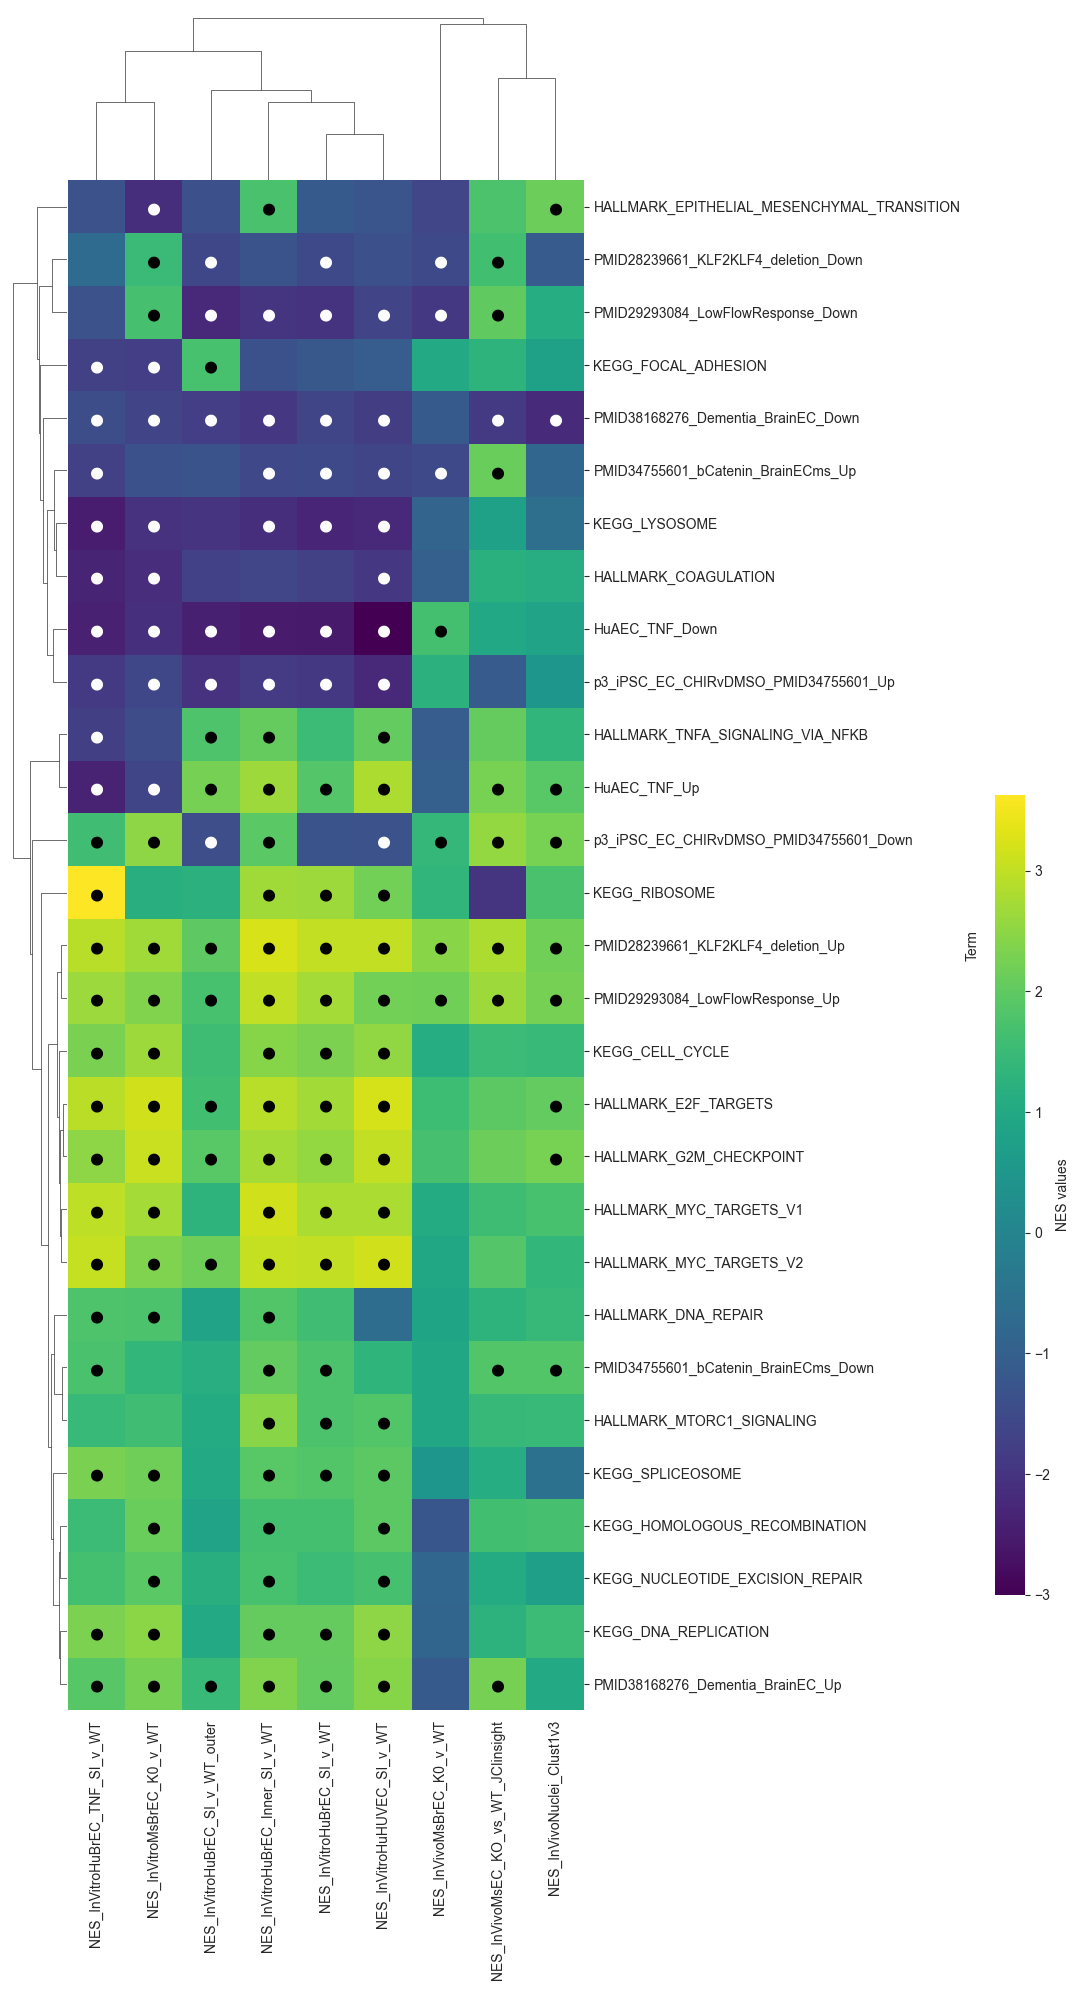

In [339]:
# Example threshold for significance
significance_threshold = 0.05
threshold_1 = 0.01  # Less than this value will get two asterisks
threshold_2 = 0.001  # Less than this value will get three asterisks

# Columns that contain p-values or q-values
pval_qval_columns = [col for col in filtered_GSEA_df.columns if 'q-val' in col]

# Corrected part for creating the significance matrix
significance_matrix = pd.DataFrame(index=filtered_GSEA_df.index, columns=direction_cols)  # Only NES columns needed

# Corrected part for creating the significance matrix
for col in pval_qval_columns:
    q_values = filtered_GSEA_df[col]
    corresponding_nes_col = col.replace('FDR q-val', 'NES')  # Assuming FDR q-val column names map directly to NES
    
    # Assign asterisks based on significance levels
    significance_matrix[corresponding_nes_col] = q_values.apply(
        lambda x: "●" if x < threshold_2 else ("●" if x < threshold_1 else ("●" if x < significance_threshold else '')))

# Select only the NES columns
# Assuming your DataFrame merged_GSEA_df has columns like 'NES_filename'
nes_cols = [col for col in filtered_GSEA_df.columns if 'NES' in col]
data_for_heatmap = filtered_GSEA_df.set_index('Term')[nes_cols]

# Replace NaN values with 0
data_for_heatmap = data_for_heatmap.fillna(0)

# Create the clustered heatmap
g = sns.clustermap(
    data_for_heatmap, 
    method='average', 
    cmap='viridis', 
    figsize=(10, 20),
    cbar_kws={"label": "NES values", "shrink": 0.5},
    xticklabels=True, 
    yticklabels=True,
    dendrogram_ratio=(.1, .1),  # Adjust the size of the dendrogram
    cbar_pos=(1, .2, .03, .4)   # Adjust the position of the colorbar
)

# Get the order of rows and columns after clustering
row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind

# Reorder the significance matrix and df nes values to match the clustered heatmap
data_for_heatmap_reordered = data_for_heatmap.iloc[row_order, :].iloc[:, col_order]
reordered_significance_matrix = significance_matrix.iloc[row_order, col_order]

# Add sig to the heatmap
for y in range(data_for_heatmap_reordered.shape[0]):
    for x in range(data_for_heatmap_reordered.shape[1]):
        nes_value = data_for_heatmap_reordered.iloc[y, x]
        signif = reordered_significance_matrix.iloc[y, x]
        if signif:  # Only add text if there are signif
            color = 'white' if nes_value < 0 else 'black'
            g.ax_heatmap.text(x + 0.5, y + 0.5, '●', ha='center', va='center', color=color, fontsize=20, rotation=90)


# Save the figure with 600 dpi
g.fig.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/HeatMapNetwork_Final.pdf', dpi=600, format='pdf')

# Plot overlap in terms

In [340]:
#read gmt file into dict
KEGG_2023_Human = gseapy.read_gmt(path="/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/c2.cp.kegg_legacy.v2023.2.Hs.symbols.gmt")

# Find the length of the longest list
max_lengthKEGG = max(len(lst) for lst in KEGG_2023_Human.values())

#read gmt file into dict
MSigDB_Hallmark_2023_Human = gseapy.read_gmt(path="/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/h.all.v2023.2.Hs.symbols.gmt")

# Find the length of the longest list
max_lengthHallmark = max(len(lst) for lst in MSigDB_Hallmark_2023_Human.values())

# Pad shorter lists with NaN
for key in KEGG_2023_Human.keys():
    length_difference = max_lengthKEGG - len(KEGG_2023_Human[key])
    if length_difference > 0:
        KEGG_2023_Human[key].extend([float('nan')] * length_difference)

for key in MSigDB_Hallmark_2023_Human.keys():
    length_difference = max_lengthHallmark - len(MSigDB_Hallmark_2023_Human[key])
    if length_difference > 0:
        MSigDB_Hallmark_2023_Human[key].extend([float('nan')] * length_difference)
        
# Convert dict to df
df_KEGG_2023_Human = pd.DataFrame.from_dict(KEGG_2023_Human)
df_MSigDB_Hallmark_2023_Human = pd.DataFrame.from_dict(MSigDB_Hallmark_2023_Human)

# Combine custom dataframes
GSEAterms_df = pd.concat([df_mouse_HsGeneID, df_human, df_KEGG_2023_Human, df_MSigDB_Hallmark_2023_Human], axis=1)

# Get the list of index values from data_for_heatmap
index_values_to_keep1 = data_for_heatmap.index.tolist()

# Remove all occurrences of '*__' from each string
index_values_to_keep2 = [item.replace('1__', '') for item in index_values_to_keep1]
index_values_to_keep = [item.replace('0__', '') for item in index_values_to_keep2]

# Filter GSEAterms_df to include only columns whose names match the terms
GSEAterms_df_filtered = GSEAterms_df[GSEAterms_df.columns.intersection(index_values_to_keep)]

In [341]:
GSEAterms_df

,PMID29293084_LowFlowResponse_Up,PMID29293084_LowFlowResponse_Down,PMID28239661_KLF2KLF4_deletion_Up,PMID28239661_KLF2KLF4_deletion_Down,PMID34755601_bCatenin_BrainECms_Down,PMID34755601_bCatenin_BrainECms_Up,PMID38168276_Dementia_BrainEC_Up,PMID38168276_Dementia_BrainEC_Down,p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up,p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down,...,HALLMARK_PROTEIN_SECRETION,HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY,HALLMARK_SPERMATOGENESIS,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_UNFOLDED_PROTEIN_RESPONSE,HALLMARK_UV_RESPONSE_DN,HALLMARK_UV_RESPONSE_UP,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_XENOBIOTIC_METABOLISM
0,ANGPT2,SERPINA1,CXCL3,RNU6-1305P,Raet1b,ESR1,HMMR,STAG3,APCDD1,COL1A1,...,ABCA1,ABCC1,ACE,ACVR1,ABCA1,ALDH18A1,ABCC1,ABCB1,ADAM17,ABCC2
1,CD177,KLK10,SLC26A9,,CRHBP,GRIN2A,AC008735.2,TIMM21,DKK2,COL1A2,...,ADAM10,ATOX1,ACRBP,APC,ACKR3,ARFGAP1,ACVR2A,ACAA1,AXIN1,ABCC3
2,KIT,CIDEA,TMEM212,,,,AOX1,AC231533.1,LPL,THY1,...,ANP32E,CAT,ACRV1,ARID4B,AREG,ASNS,ADD3,AGO2,AXIN2,ABCD2
3,CD300LF,,,CYP1A1,,FOSB,VGLL3,FGGY,PCSK2,IGFBP5,...,AP1G1,CDKN2D,ACTL7B,BCAR3,ATF3,ATF3,ADGRL2,ALAS1,CCND2,ABHD6
4,IL1B,,GKN1,,LARS2,,CENPU,LINC02256,LSR,MME,...,AP2B1,EGLN2,ADAD1,BMP2,ATP2B1,ATF4,ADORA2B,ALDOA,CSNK1E,ACO2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL033504.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOSB,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC007611.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL591518.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [342]:
index_values_to_keep

['PMID28239661_KLF2KLF4_deletion_Down',
 'PMID28239661_KLF2KLF4_deletion_Up',
 'PMID29293084_LowFlowResponse_Down',
 'PMID29293084_LowFlowResponse_Up',
 'PMID34755601_bCatenin_BrainECms_Down',
 'PMID34755601_bCatenin_BrainECms_Up',
 'KEGG_CELL_CYCLE',
 'KEGG_DNA_REPLICATION',
 'KEGG_FOCAL_ADHESION',
 'KEGG_HOMOLOGOUS_RECOMBINATION',
 'KEGG_LYSOSOME',
 'KEGG_NUCLEOTIDE_EXCISION_REPAIR',
 'KEGG_RIBOSOME',
 'KEGG_SPLICEOSOME',
 'HALLMARK_COAGULATION',
 'HALLMARK_DNA_REPAIR',
 'HALLMARK_E2F_TARGETS',
 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION',
 'HALLMARK_G2M_CHECKPOINT',
 'HALLMARK_MTORC1_SIGNALING',
 'HALLMARK_MYC_TARGETS_V1',
 'HALLMARK_MYC_TARGETS_V2',
 'HALLMARK_TNFA_SIGNALING_VIA_NFKB',
 'HuAEC_TNF_Down',
 'HuAEC_TNF_Up',
 'PMID38168276_Dementia_BrainEC_Down',
 'PMID38168276_Dementia_BrainEC_Up',
 'p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down',
 'p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up']

In [343]:
GSEAterms_df_filtered

,PMID29293084_LowFlowResponse_Up,PMID29293084_LowFlowResponse_Down,PMID28239661_KLF2KLF4_deletion_Up,PMID28239661_KLF2KLF4_deletion_Down,PMID34755601_bCatenin_BrainECms_Down,PMID34755601_bCatenin_BrainECms_Up,PMID38168276_Dementia_BrainEC_Up,PMID38168276_Dementia_BrainEC_Down,p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up,p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down,...,KEGG_SPLICEOSOME,HALLMARK_COAGULATION,HALLMARK_DNA_REPAIR,HALLMARK_E2F_TARGETS,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_G2M_CHECKPOINT,HALLMARK_MTORC1_SIGNALING,HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V2,HALLMARK_TNFA_SIGNALING_VIA_NFKB
0,ANGPT2,SERPINA1,CXCL3,RNU6-1305P,Raet1b,ESR1,HMMR,STAG3,APCDD1,COL1A1,...,ACIN1,A2M,AAAS,AK2,ABI3BP,ABL1,ABCF2,ABCE1,AIMP2,ABCA1
1,CD177,KLK10,SLC26A9,,CRHBP,GRIN2A,AC008735.2,TIMM21,DKK2,COL1A2,...,ALYREF,ACOX2,ADA,ANP32E,ACTA2,AMD1,ACACA,ACP1,BYSL,ACKR3
2,KIT,CIDEA,TMEM212,,,,AOX1,AC231533.1,LPL,THY1,...,AQR,ADAM9,ADCY6,ASF1A,ADAM12,ARID4A,ACLY,AIMP2,CBX3,AREG
3,CD300LF,,,CYP1A1,,FOSB,VGLL3,FGGY,PCSK2,IGFBP5,...,BCAS2,ANG,ADRM1,ASF1B,ANPEP,ATF5,ACSL3,AP3S1,CDK4,ATF3
4,IL1B,,GKN1,,LARS2,,CENPU,LINC02256,LSR,MME,...,BUD31,ANXA1,AGO4,ATAD2,APLP1,ATRX,ACTR2,APEX1,DCTPP1,ATP2B1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL033504.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOSB,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC007611.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL591518.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [344]:
# Create an empty dictionary with current column names as keys
column_mapping = {col: None for col in GSEAterms_df_filtered.columns}

# Print the dictionary with both key and value in quotes on a new line
for key, value in column_mapping.items():
    print(f'"{key}": "{value}",')

"PMID29293084_LowFlowResponse_Up": "None",
"PMID29293084_LowFlowResponse_Down": "None",
"PMID28239661_KLF2KLF4_deletion_Up": "None",
"PMID28239661_KLF2KLF4_deletion_Down": "None",
"PMID34755601_bCatenin_BrainECms_Down": "None",
"PMID34755601_bCatenin_BrainECms_Up": "None",
"PMID38168276_Dementia_BrainEC_Up": "None",
"PMID38168276_Dementia_BrainEC_Down": "None",
"p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up": "None",
"p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down": "None",
"HuAEC_TNF_Up": "None",
"HuAEC_TNF_Down": "None",
"KEGG_CELL_CYCLE": "None",
"KEGG_DNA_REPLICATION": "None",
"KEGG_FOCAL_ADHESION": "None",
"KEGG_HOMOLOGOUS_RECOMBINATION": "None",
"KEGG_LYSOSOME": "None",
"KEGG_NUCLEOTIDE_EXCISION_REPAIR": "None",
"KEGG_RIBOSOME": "None",
"KEGG_SPLICEOSOME": "None",
"HALLMARK_COAGULATION": "None",
"HALLMARK_DNA_REPAIR": "None",
"HALLMARK_E2F_TARGETS": "None",
"HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION": "None",
"HALLMARK_G2M_CHECKPOINT": "None",
"HALLMARK_MTORC1_SIGNALING": "None",
"HALLMARK_MYC_T

In [382]:
# Create a dictionary to map old column names to new column names
column_mapping = {
"PMID29293084_LowFlowResponse_Up": "LowFlow_Up",
"PMID29293084_LowFlowResponse_Down": "LowFlow_Down",
"PMID28239661_KLF2KLF4_deletion_Up": "Klf2Klf4del_Up",
"PMID28239661_KLF2KLF4_deletion_Down": "Klf2Klf4del_Down",
"PMID34755601_bCatenin_BrainECms_Down": "Bcatenin_Down",
"PMID34755601_bCatenin_BrainECms_Up": "Bcatenin_Up",
"PMID38168276_Dementia_BrainEC_Up": "Dementia_Up",
"PMID38168276_Dementia_BrainEC_Down": "Dementia_Down",
"p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up": "CHIR_Up",
"p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down": "CHIR_Down",
"HuAEC_TNF_Up": "TNF_Up",
"HuAEC_TNF_Down": "TNF_Down",
"KEGG_CELL_CYCLE": "Cell_Cycle",
"KEGG_DNA_REPLICATION": "Replication",
"KEGG_FOCAL_ADHESION": "Focal_adhesion",
"KEGG_HOMOLOGOUS_RECOMBINATION": "Homologous_recombination",
"KEGG_LYSOSOME": "Lysosome",
"KEGG_NUCLEOTIDE_EXCISION_REPAIR": "Excision_repair",
"KEGG_RIBOSOME": "Ribosome",
"KEGG_SPLICEOSOME": "Spliceosome",
"HALLMARK_COAGULATION": "Coagulation",
"HALLMARK_DNA_REPAIR": "DNA_repair",
"HALLMARK_E2F_TARGETS": "EF2_targets",
"HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION": "EndoMT",
"HALLMARK_G2M_CHECKPOINT": "G2M",
"HALLMARK_MTORC1_SIGNALING": "Mtorc1",
"HALLMARK_MYC_TARGETS_V1": "Myc_targets.1",
"HALLMARK_MYC_TARGETS_V2": "Myc_targets.2",
"HALLMARK_TNFA_SIGNALING_VIA_NFKB": "TNF"
}

# Create a copy of GSEAterms_df_filtered
GSEAterms_df_filtered_copy = GSEAterms_df_filtered.copy()

# Use the rename method to replace column names in the copy
GSEAterms_df_filtered_copy.rename(columns=column_mapping, inplace=True)

In [383]:
GSEAterms_df_filtered_copy

,LowFlow_Up,LowFlow_Down,Klf2Klf4del_Up,Klf2Klf4del_Down,Bcatenin_Down,Bcatenin_Up,Dementia_Up,Dementia_Down,CHIR_Up,CHIR_Down,...,Spliceosome,Coagulation,DNA_repair,EF2_targets,EndoMT,G2M,Mtorc1,Myc_targets.1,Myc_targets.2,TNF
0,ANGPT2,SERPINA1,CXCL3,RNU6-1305P,Raet1b,ESR1,HMMR,STAG3,APCDD1,COL1A1,...,ACIN1,A2M,AAAS,AK2,ABI3BP,ABL1,ABCF2,ABCE1,AIMP2,ABCA1
1,CD177,KLK10,SLC26A9,,CRHBP,GRIN2A,AC008735.2,TIMM21,DKK2,COL1A2,...,ALYREF,ACOX2,ADA,ANP32E,ACTA2,AMD1,ACACA,ACP1,BYSL,ACKR3
2,KIT,CIDEA,TMEM212,,,,AOX1,AC231533.1,LPL,THY1,...,AQR,ADAM9,ADCY6,ASF1A,ADAM12,ARID4A,ACLY,AIMP2,CBX3,AREG
3,CD300LF,,,CYP1A1,,FOSB,VGLL3,FGGY,PCSK2,IGFBP5,...,BCAS2,ANG,ADRM1,ASF1B,ANPEP,ATF5,ACSL3,AP3S1,CDK4,ATF3
4,IL1B,,GKN1,,LARS2,,CENPU,LINC02256,LSR,MME,...,BUD31,ANXA1,AGO4,ATAD2,APLP1,ATRX,ACTR2,APEX1,DCTPP1,ATP2B1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL033504.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOSB,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC007611.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL591518.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [384]:
# Check for duplicate column names
duplicate_columns = GSEAterms_df_filtered_copy.columns[GSEAterms_df_filtered_copy.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)


Duplicate columns: Index([], dtype='object')


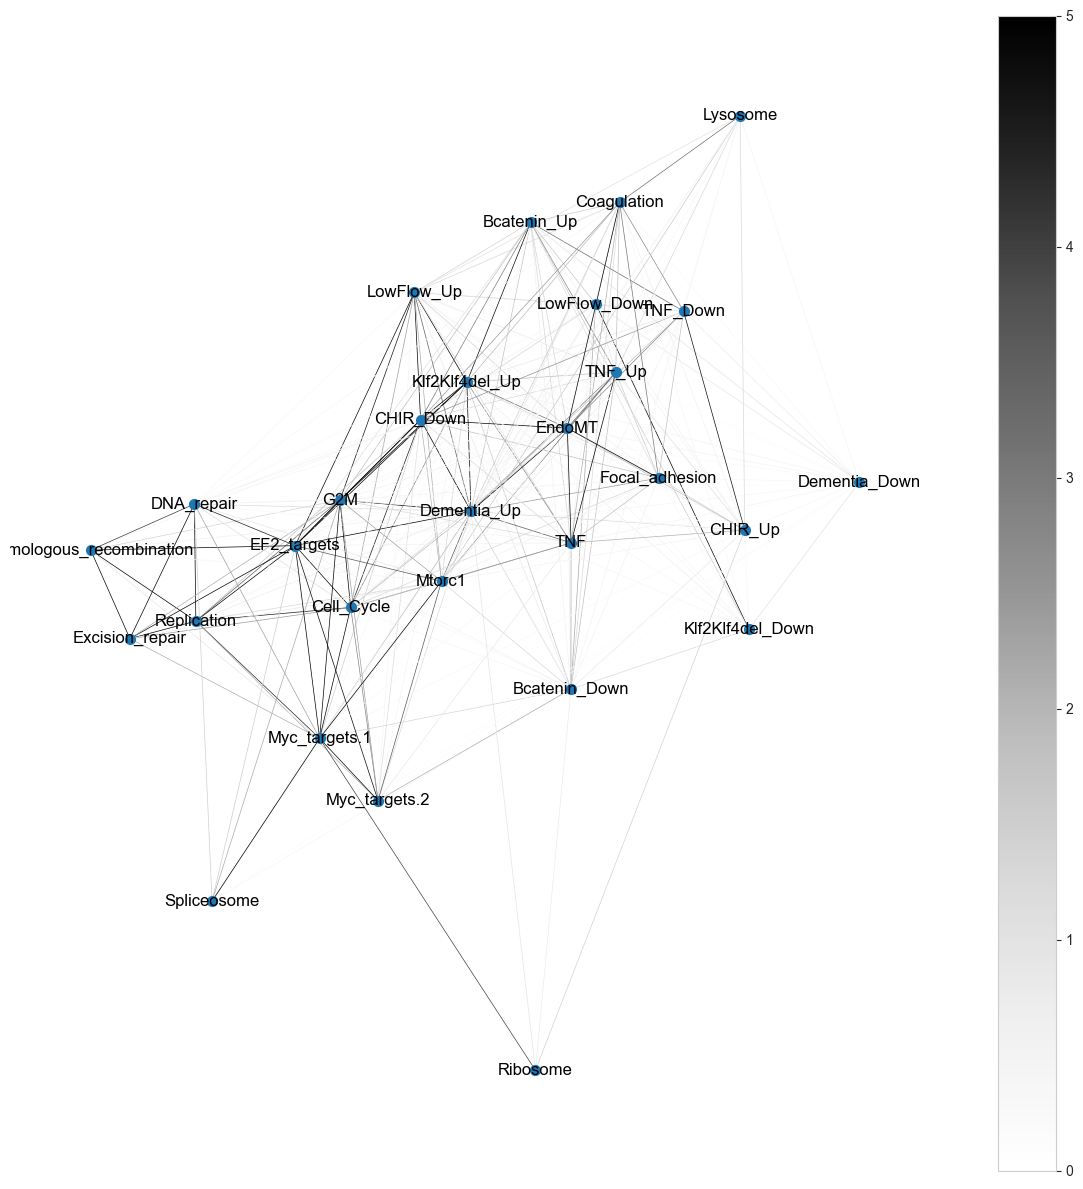

In [385]:
# Create a dictionary to store the mapping between node numbers and term names
node_names = {i: termgsea for i, termgsea in enumerate(GSEAterms_df_filtered_copy.columns)}

G = nx.Graph()

# Add nodes to the graph with numbering and store the mapping
for node, termgsea in node_names.items():
    G.add_node(node, label=termgsea)  # Add node with number and term label

    
# Add edges to the graph based on gene similarities
for i, term1 in enumerate(GSEAterms_df_filtered_copy.columns):
    for j, term2 in enumerate(GSEAterms_df_filtered_copy.columns):
        if i < j:  # Avoid self-loop and redundant connections
            genes1 = set(GSEAterms_df_filtered_copy[term1].dropna())
            genes2 = set(GSEAterms_df_filtered_copy[term2].dropna())
            common_genes = genes1.intersection(genes2)
            total_genes = genes1.union(genes2)
            num_total_genes = len(total_genes)
            num_common_genes = len(common_genes)
            if num_total_genes > 0:  # Avoid division by zero
                percent_overlap = (num_common_genes / num_total_genes) * 100
                if percent_overlap > 0:
                    G.add_edge(i, j, weight=percent_overlap, width=percent_overlap)

    
# Remove isolated nodes (those not connected to any other node)
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

for node in list(G.nodes()):
    if G.degree(node) <= 1:
        G.remove_node(node)

# After modifying the graph (adding/removing nodes and edges)
pos = nx.spring_layout(G)  # Recalculate positions for the updated graph

# Update node_labels only for nodes present in the updated graph
node_labels = {node: node_names[node] for node in G.nodes()}
        
# Now you can draw the graph
fig, ax = plt.subplots(figsize=(15, 15))

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Extracting weights from the graph for edge colors
weights = [G[u][v]['weight'] for u, v in G.edges()]

# Normalize the weights to a fixed range between 0 and 100 for coloring
norm = mcolors.Normalize(vmin=0, vmax=5)  # set fixed scale here

# Choose a colormap
cmap = plt.cm.Greys  # using Greys colormap for black and grey color scale

# Draw the graph with term labels
node_labels = {node: label for node, label in node_names.items()}
nx.draw(G, pos, labels=node_labels, with_labels=True,
        font_size=12,  # Adjust font size as needed
        edge_color=[cmap(norm(w)) for w in weights],
        width=0.5,  # Fixed thin width
        node_size=50,  # Adjust node size as needed
        ax=ax)

# Optionally, you can add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax)

plt.show()

# Save the figure as a PDF with 600 dpi
fig.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/OmarGeneSetOverlap.pdf', dpi=600, format='pdf')

In [386]:
node_labels

{0: 'LowFlow_Up',
 1: 'LowFlow_Down',
 2: 'Klf2Klf4del_Up',
 3: 'Klf2Klf4del_Down',
 4: 'Bcatenin_Down',
 5: 'Bcatenin_Up',
 6: 'Dementia_Up',
 7: 'Dementia_Down',
 8: 'CHIR_Up',
 9: 'CHIR_Down',
 10: 'TNF_Up',
 11: 'TNF_Down',
 12: 'Cell_Cycle',
 13: 'Replication',
 14: 'Focal_adhesion',
 15: 'Homologous_recombination',
 16: 'Lysosome',
 17: 'Excision_repair',
 18: 'Ribosome',
 19: 'Spliceosome',
 20: 'Coagulation',
 21: 'DNA_repair',
 22: 'EF2_targets',
 23: 'EndoMT',
 24: 'G2M',
 25: 'Mtorc1',
 26: 'Myc_targets.1',
 27: 'Myc_targets.2',
 28: 'TNF'}

# Show individual GSEA plots

In [387]:
###NOTE to plot GSEA terms, need to use the correct results (from merging above)

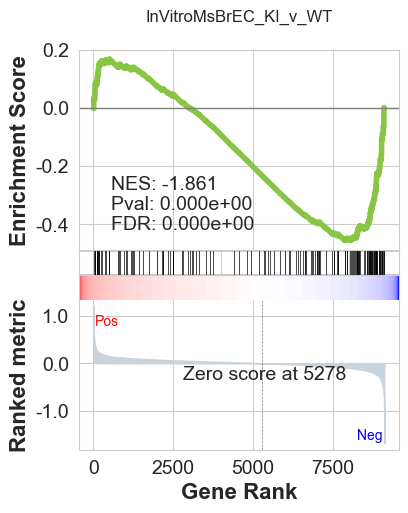

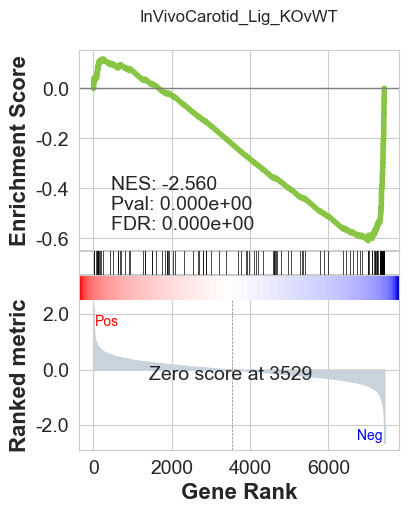

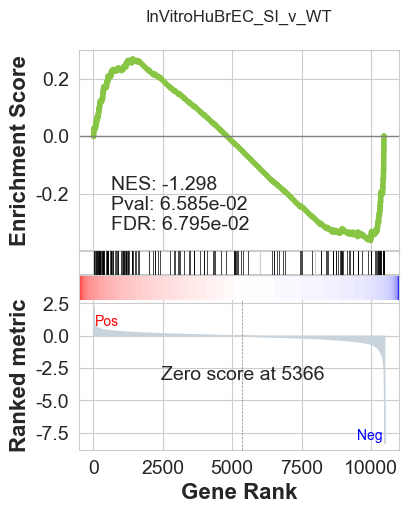

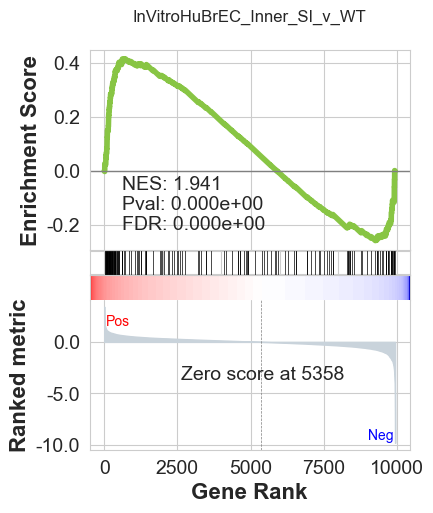

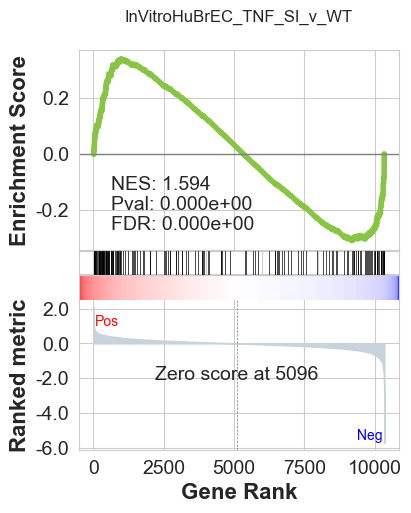

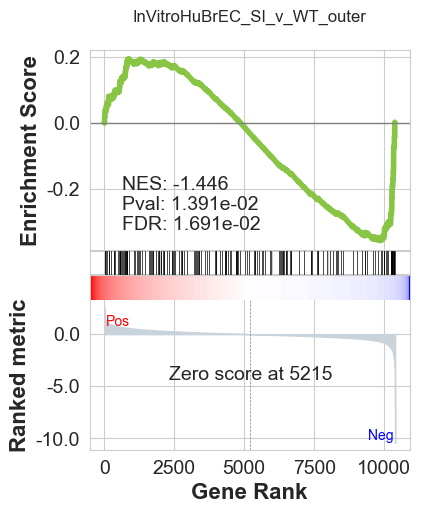

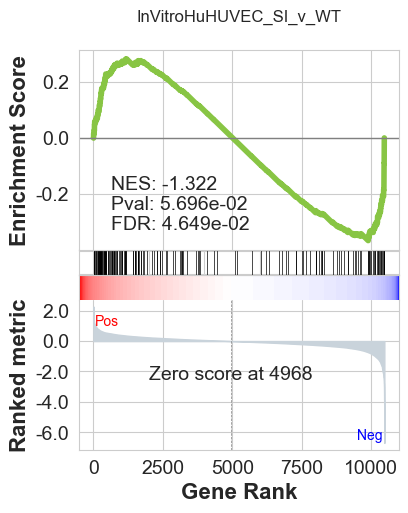

KeyError: 'p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down'

In [390]:
term_search = 'p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down'

# Create a directory for the term if it doesn't exist
path = f"/Users/patrickmurphy/Desktop/GSEA_figures/{term_search}"
if not os.path.exists(path):
    os.makedirs(path)

# Loop through each item in the dictionary and plot (make sure to pick the results file corresponding to the gene term picked)
for title, data in gsea_result_custom2.items():
    # Plot the data
    fig = data.plot(terms=term_search)
    
    # Set the title of the plot
    fig.suptitle(title)

    # Save the plot as a PDF in the specific term folder
    fig.savefig(f"{path}/{title.replace(' ', '_')}.pdf", format='pdf')
        
    # Display the plot
    plt.show()

# Focused X-Y plots on GSEA sets

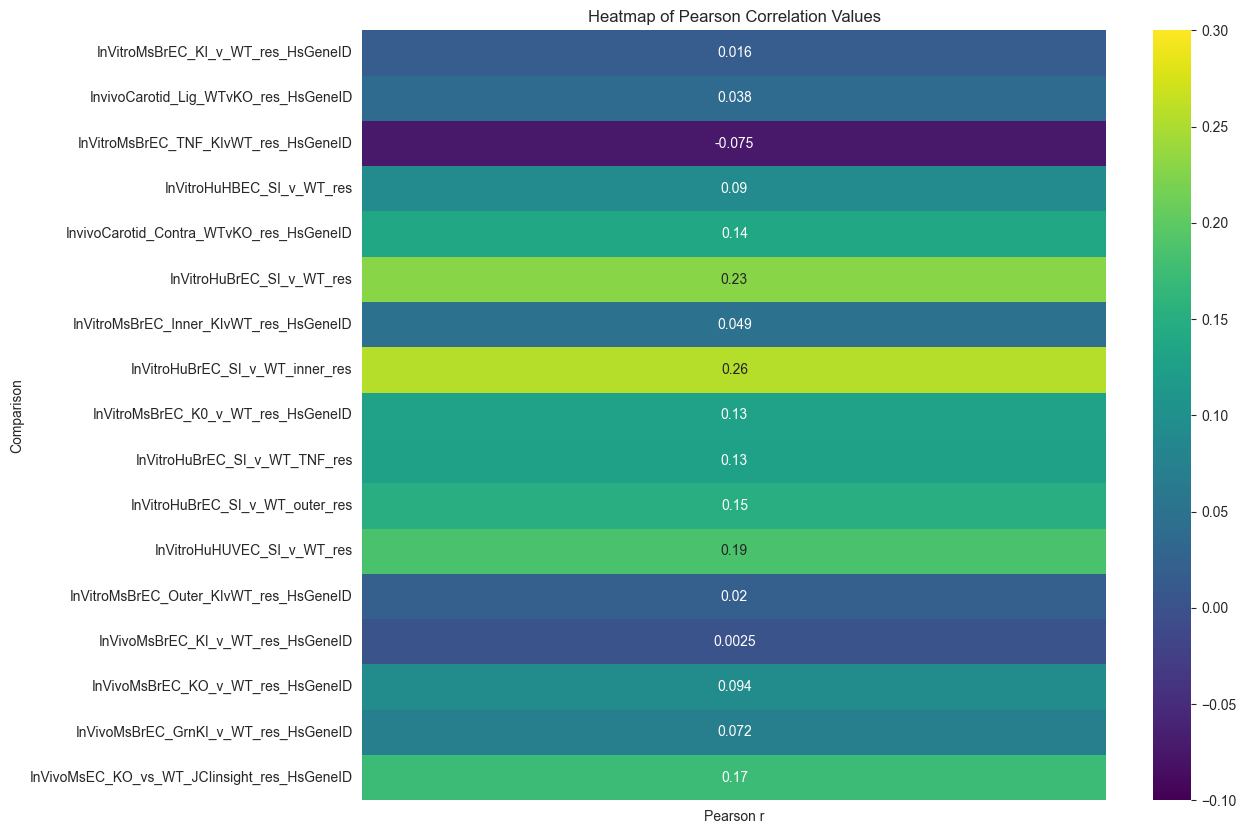

In [405]:
# Dictionary of dataframes (assuming they are already loaded in)
df_dict_humangene_res = {
    'InVitroMsBrEC_KI_v_WT_res_HsGeneID': InVitroMsBrEC_KI_v_WT_res_HsGeneID,
    'InvivoCarotid_Lig_WTvKO_res_HsGeneID': InvivoCarotid_Lig_WTvKO_res_HsGeneID,
    'InVitroMsBrEC_TNF_KIvWT_res_HsGeneID': InVitroMsBrEC_TNF_KIvWT_res_HsGeneID,
    'InVitroHuHBEC_SI_v_WT_res': InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res_HsGeneID': InvivoCarotid_Contra_WTvKO_res_HsGeneID, 
    'InVitroHuBrEC_SI_v_WT_res': InVitroHuBrEC_SI_v_WT_res,
    'InVitroMsBrEC_Inner_KIvWT_res_HsGeneID': InVitroMsBrEC_Inner_KIvWT_res_HsGeneID,
    'InVitroHuBrEC_SI_v_WT_inner_res': InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res_HsGeneID': InVitroMsBrEC_K0_v_WT_res_HsGeneID,
    'InVitroHuBrEC_SI_v_WT_TNF_res': InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res': InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuHUVEC_SI_v_WT_res': InVitroHuHUVEC_SI_v_WT_res,
    'InVitroMsBrEC_Outer_KIvWT_res_HsGeneID': InVitroMsBrEC_Outer_KIvWT_res_HsGeneID,
    'InVivoMsBrEC_KI_v_WT_res_HsGeneID': InVivoMsBrEC_KI_v_WT_res_HsGeneID,
    'InVivoMsBrEC_KO_v_WT_res_HsGeneID': InVivoMsBrEC_KO_v_WT_res_HsGeneID,
    'InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID': InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID,
    'InVivoMsEC_KO_vs_WT_JCIinsight_res_HsGeneID': InVivoMsEC_KO_vs_WT_JCIinsight_res_HsGeneID,
    'InVivoNuclei_Clust1v3_res_format': InVivoNuclei_Clust1v3_res_formatted
}

# Reference DataFrame (assuming you have a separate reference)
reference_df = df_dict_humangene_res['InVivoNuclei_Clust1v3_res_format']  # Example reference

# Function to calculate Pearson correlation for log2 fold change values
def calculate_correlation(reference_df, compare_df):
    reference_df = reference_df.rename(columns={'pvalue': 'pvalue_ref', 'padj': 'padj_ref', 'log2FoldChange': 'log2FoldChange_ref'})
    compare_df = compare_df.rename(columns={'pvalue': 'pvalue_comp', 'padj': 'padj_comp', 'log2FoldChange': 'log2FoldChange_comp'})
    joined_df = reference_df.join(compare_df[['pvalue_comp', 'padj_comp', 'log2FoldChange_comp']], how='outer')
    filtered_df = joined_df.dropna(subset=['log2FoldChange_ref', 'log2FoldChange_comp'])
    filtered_df = filtered_df[(filtered_df['pvalue_ref'] < 0.05)]
    filtered_df = filtered_df[(filtered_df['log2FoldChange_ref'] > -10) & (filtered_df['log2FoldChange_ref'] < 10)]
    filtered_df = filtered_df[(filtered_df['log2FoldChange_comp'] > -10) & (filtered_df['log2FoldChange_comp'] < 10)]
    log2fold_ref = filtered_df['log2FoldChange_ref']
    log2fold_comp = filtered_df['log2FoldChange_comp']
    correlation, _ = stats.pearsonr(log2fold_ref, log2fold_comp)
    return correlation

# Calculate correlations for each comparison
correlations = {}
for compare_name, compare_df in df_dict_humangene_res.items():
    if compare_name == 'InVivoNuclei_Clust1v3_res_format':
        continue
    correlations[compare_name] = calculate_correlation(reference_df, compare_df)

# Convert correlations to DataFrame
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Pearson r'])

# Create a heatmap with viridis color scheme and set scale from -0.1 to 0.3
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_df, annot=True, cmap='viridis', vmin=-0.1, vmax=0.3)
plt.title('Heatmap of Pearson Correlation Values')
plt.ylabel('Comparison')

# Save as PDF file
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/heatmap_correlations_genewise_ourdata.pdf', format='pdf')

# Show the plot (optional)
plt.show()


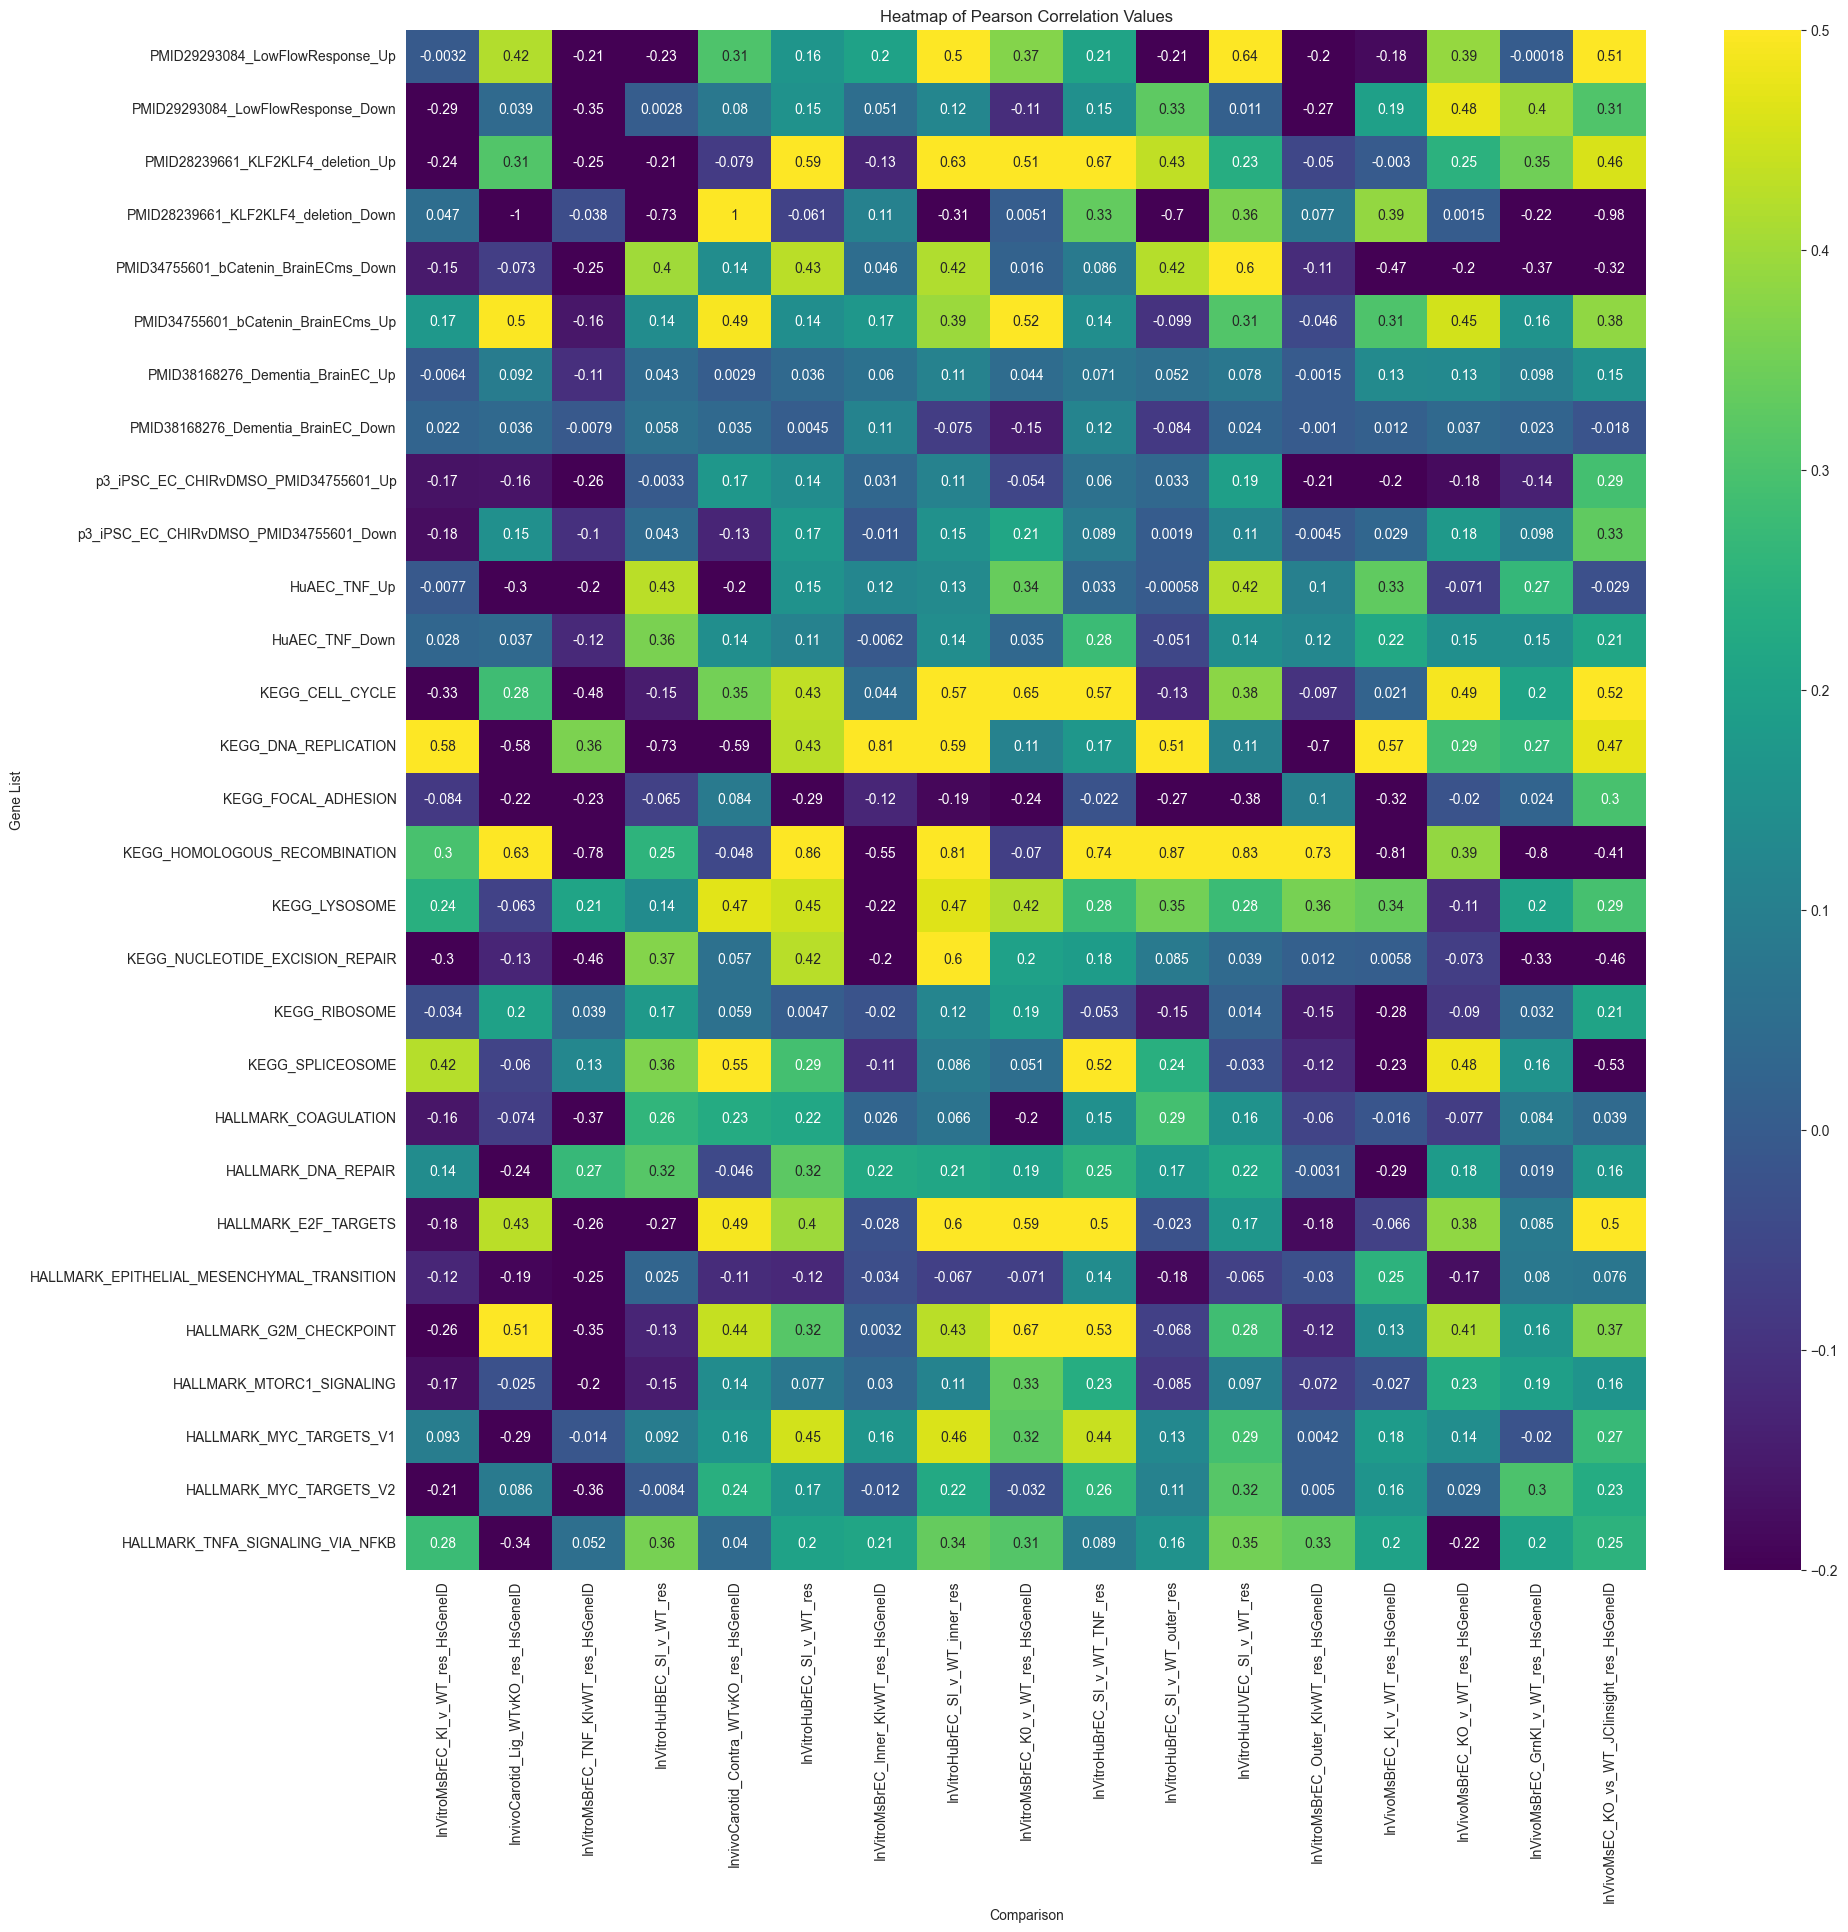

In [406]:
# Dictionary of dataframes (assuming they are already loaded in)
df_dict_humangene_res = {
    'InVitroMsBrEC_KI_v_WT_res_HsGeneID': InVitroMsBrEC_KI_v_WT_res_HsGeneID,
    'InvivoCarotid_Lig_WTvKO_res_HsGeneID': InvivoCarotid_Lig_WTvKO_res_HsGeneID,
    'InVitroMsBrEC_TNF_KIvWT_res_HsGeneID': InVitroMsBrEC_TNF_KIvWT_res_HsGeneID,
    'InVitroHuHBEC_SI_v_WT_res': InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res_HsGeneID': InvivoCarotid_Contra_WTvKO_res_HsGeneID, 
    'InVitroHuBrEC_SI_v_WT_res': InVitroHuBrEC_SI_v_WT_res,
    'InVitroMsBrEC_Inner_KIvWT_res_HsGeneID': InVitroMsBrEC_Inner_KIvWT_res_HsGeneID,
    'InVitroHuBrEC_SI_v_WT_inner_res': InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res_HsGeneID': InVitroMsBrEC_K0_v_WT_res_HsGeneID,
    'InVitroHuBrEC_SI_v_WT_TNF_res': InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res': InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuHUVEC_SI_v_WT_res': InVitroHuHUVEC_SI_v_WT_res,
    'InVitroMsBrEC_Outer_KIvWT_res_HsGeneID': InVitroMsBrEC_Outer_KIvWT_res_HsGeneID,
    'InVivoMsBrEC_KI_v_WT_res_HsGeneID': InVivoMsBrEC_KI_v_WT_res_HsGeneID,
    'InVivoMsBrEC_KO_v_WT_res_HsGeneID': InVivoMsBrEC_KO_v_WT_res_HsGeneID,
    'InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID': InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID,
    'InVivoMsEC_KO_vs_WT_JCIinsight_res_HsGeneID': InVivoMsEC_KO_vs_WT_JCIinsight_res_HsGeneID,
    'InVivoNuclei_Clust1v3_res_format': InVivoNuclei_Clust1v3_res_formatted
}

# Reference DataFrame (example)
reference_df = df_dict_humangene_res['InVivoNuclei_Clust1v3_res_format']

# Function to calculate Pearson correlation for log2 fold change values
def calculate_correlation(reference_df, compare_df, gene_list):
    reference_df = reference_df.rename(columns={'pvalue': 'pvalue_ref', 'padj': 'padj_ref', 'log2FoldChange': 'log2FoldChange_ref'})
    compare_df = compare_df.rename(columns={'pvalue': 'pvalue_comp', 'padj': 'padj_comp', 'log2FoldChange': 'log2FoldChange_comp'})
    joined_df = reference_df.join(compare_df[['pvalue_comp', 'padj_comp', 'log2FoldChange_comp']], how='outer')
    filtered_df = joined_df.dropna(subset=['log2FoldChange_ref', 'log2FoldChange_comp'])
    filtered_df = filtered_df[(filtered_df['pvalue_ref'] < 0.05)]
    filtered_df = filtered_df[(filtered_df['log2FoldChange_ref'] > -10) & (filtered_df['log2FoldChange_ref'] < 10)]
    filtered_df = filtered_df[(filtered_df['log2FoldChange_comp'] > -10) & (filtered_df['log2FoldChange_comp'] < 10)]
    
    # Filter for genes in the gene_list
    filtered_df = filtered_df[filtered_df.index.isin(gene_list)]
    
    log2fold_ref = filtered_df['log2FoldChange_ref']
    log2fold_comp = filtered_df['log2FoldChange_comp']
    
    # Calculate Pearson correlation
    correlation, _ = stats.pearsonr(log2fold_ref, log2fold_comp)
    return correlation

# Dictionary to store correlations
correlations = {}

# Get gene lists from GSEAterms_df_filtered
gene_lists = {col: GSEAterms_df_filtered[col].dropna().tolist() for col in GSEAterms_df_filtered.columns}

# Calculate correlations for each comparison and each gene list
for compare_name, compare_df in df_dict_humangene_res.items():
    if compare_name == 'InVivoNuclei_Clust1v3_res_format':
        continue
    
    # Initialize correlation list for current comparison
    comparison_correlations = []
    
    # Calculate correlation for each gene list
    for col_name, gene_list in gene_lists.items():
        correlation = calculate_correlation(reference_df, compare_df, gene_list)
        comparison_correlations.append(correlation)
    
    # Store correlations for current comparison
    correlations[compare_name] = comparison_correlations

# Convert correlations dictionary to DataFrame
correlation_df = pd.DataFrame(correlations, index=gene_lists.keys())

# Create heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_df, annot=True, cmap='viridis', vmin=-0.2, vmax=0.5)
plt.title('Heatmap of Pearson Correlation Values')
plt.ylabel('Gene List')
plt.xlabel('Comparison')

# Save as PDF file
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/heatmap_correlations_genewise.pdf', format='pdf')

# Show the plot (optional)
plt.show()

In [415]:
column_names = GSEAterms_df_filtered.columns.tolist()
print(column_names)

['PMID29293084_LowFlowResponse_Up', 'PMID29293084_LowFlowResponse_Down', 'PMID28239661_KLF2KLF4_deletion_Up', 'PMID28239661_KLF2KLF4_deletion_Down', 'PMID34755601_bCatenin_BrainECms_Down', 'PMID34755601_bCatenin_BrainECms_Up', 'PMID38168276_Dementia_BrainEC_Up', 'PMID38168276_Dementia_BrainEC_Down', 'p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up', 'p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down', 'HuAEC_TNF_Up', 'HuAEC_TNF_Down', 'KEGG_CELL_CYCLE', 'KEGG_DNA_REPLICATION', 'KEGG_FOCAL_ADHESION', 'KEGG_HOMOLOGOUS_RECOMBINATION', 'KEGG_LYSOSOME', 'KEGG_NUCLEOTIDE_EXCISION_REPAIR', 'KEGG_RIBOSOME', 'KEGG_SPLICEOSOME', 'HALLMARK_COAGULATION', 'HALLMARK_DNA_REPAIR', 'HALLMARK_E2F_TARGETS', 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION', 'HALLMARK_G2M_CHECKPOINT', 'HALLMARK_MTORC1_SIGNALING', 'HALLMARK_MYC_TARGETS_V1', 'HALLMARK_MYC_TARGETS_V2', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB']


In [471]:
gene_set_name = "PMID28239661_KLF2KLF4_deletion_Up"

def get_geneset(gene_set_name, datasets):
  """
  Tries to find the genes associated with a gene set name in multiple datasets.

  Args:
    gene_set_name: The name of the gene set to search for.
    datasets: A dictionary containing gene sets from different sources.
              Keys should be dataset names (e.g., "custom_endo_mus_genesets", "Kegg_2023").
              Values should be dictionaries where keys are gene set names and values are gene lists.

  Returns:
    A list of genes associated with the gene set name if found in any dataset, otherwise an empty list.
  """

  found_dataset_name = None  # Initialize to None

  # Loop through each dataset
  for dataset_name, gene_set_data in datasets.items():
    # Check if gene set name exists in the current dataset
    if gene_set_name in gene_set_data:
      found_dataset_name = dataset_name  # Update if found
      return gene_set_data[gene_set_name]  # Return genes if found

  # If not found in any dataset, return an empty list
  return []

# Combine datasets into a single dictionary (optional, but improves readability)
datasets = {
  "custom_endo_mus_HsID_genesets": custom_endo_mus_HsID_genesets,
  "custom_endo_human_genesets": custom_endo_human_genesets,
  "Kegg_2023": Kegg_2023,
  "Hallmark_2023": Hallmark_2023
}

gsea_term_genes = get_geneset(gene_set_name, datasets)

if gsea_term_genes:
  print(f"Genes found for {gene_set_name}")
  print(gsea_term_genes)
else:
  print(f"Gene set {gene_set_name} not found in any datasets")

Genes found for PMID28239661_KLF2KLF4_deletion_Up
['CXCL3', 'SLC26A9', 'TMEM212', '', 'GKN1', '', 'TEX38', '', '', '', 'SERPINA1', 'CRHBP', 'FGF23', 'CLIC6', 'SGK2', '', 'AKR1B10', 'C15orf48', 'SH2D5', 'GRIN2A', 'ARG1', '', 'DISP2', 'TNFRSF9', 'GAP43', 'TNC', 'HMGA2', 'MADCAM1', '', 'STEAP1B', '', 'Fam19a2', 'KRT23', 'INHBB', 'GAL', '', '', 'CPA1', 'PTCHD1', 'PGF', '', 'KLRB1', 'NXPH1', 'CSF2', 'BEAN1', 'DGKK', 'NIPAL1', 'HAO1', 'AKR1B10', 'TIMP1', '', 'Wisp1', '', 'TMEM252', 'SPINT1', 'CACNG4', 'EREG', 'RAB15', 'NMRK2', 'MMP14', 'OIT3', 'MEST', 'UBE2C', 'TNNI1', 'ANGPTL4', 'MGARP', 'DEPDC1', 'CDC25C', 'CCNB1', 'RBP2', 'TUBB6', 'ALDH1A2', 'SYT4', 'RHBDL2', 'SPATA18', 'CDK1', 'MMP3', 'PRG2', 'LIF', 'KCNMB4', 'AUNIP', 'STIL', 'GLIPR2', '', 'CXCL6', '', '', 'GABRB2', '2810417H13Rik', 'SHCBP1', 'Hist1h2ah', 'KIF2C', 'PTX3', 'FREM1', 'SERPINE1', 'CDCA8', 'PTPRN', '', 'APLN', 'CPA2', 'GABRA1', 'IL1A', 'DLGAP5', 'CELF4', 'HMMR', 'ETV4', 'NAALADL1', 'SH3GL3', 'CCNA2', 'SPC25', 'CCNB2', 'DBN1',

<Figure size 1200x800 with 0 Axes>

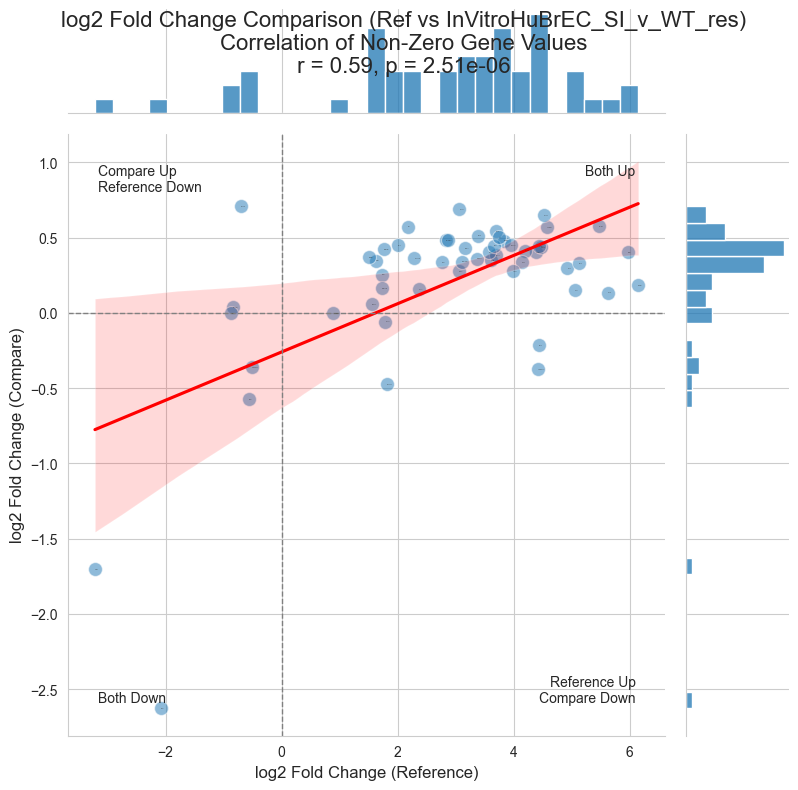

<Figure size 1200x800 with 0 Axes>

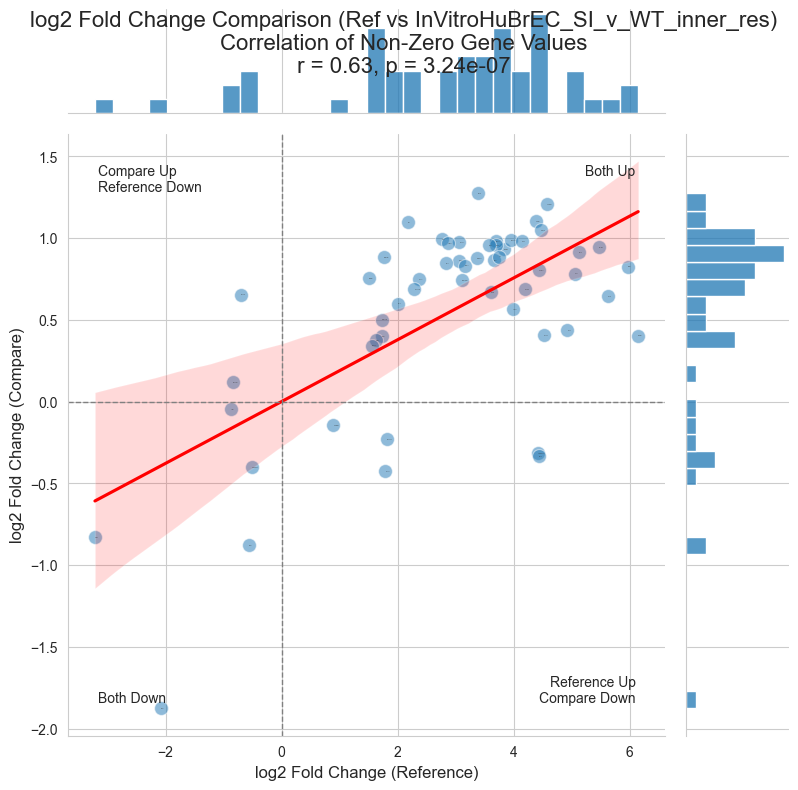

<Figure size 1200x800 with 0 Axes>

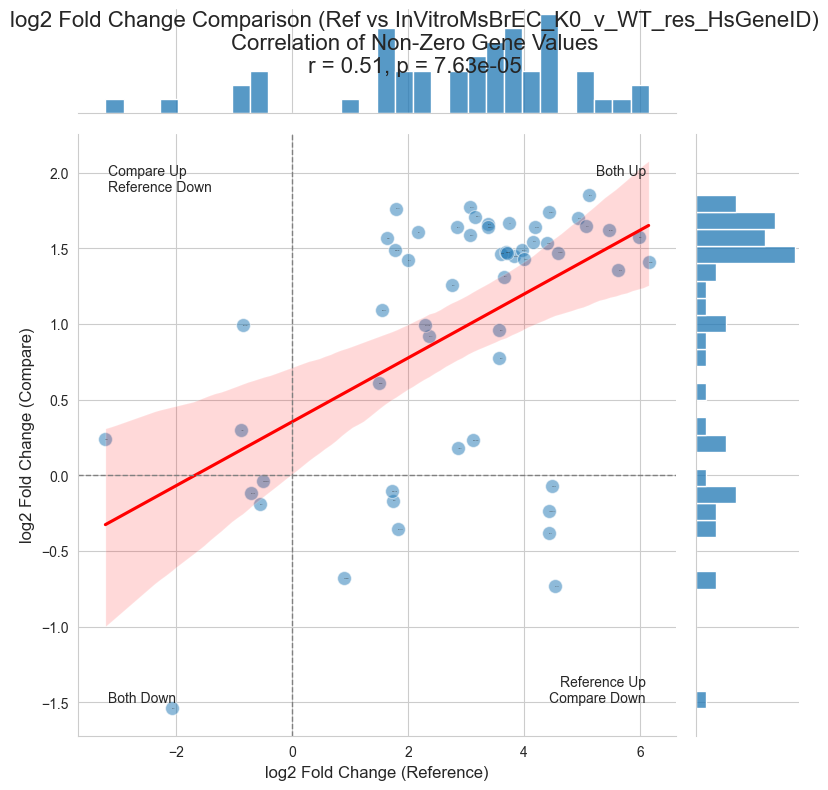

<Figure size 1200x800 with 0 Axes>

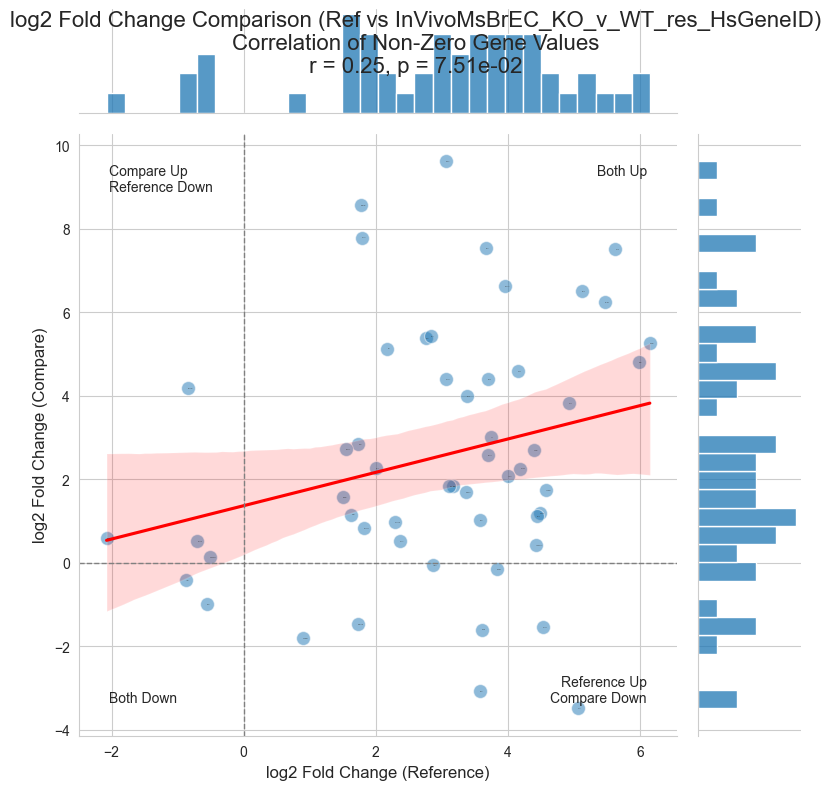

In [472]:
# To extract a specific gene set
#gene_set_name = "HuAEC_TNF_Up" #Replace with your actual gene set name
#gene_set_name = "p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down" #Replace with your actual gene set name
#gsea_term_genes = custom_endo_mus_genesets.get(gene_set_name, [])

# Convert the set of genes to a list for the DataFrame index
gsea_term_genes_list = list(gsea_term_genes)

df_dict_humangene_res = {
#    'InVitroMsBrEC_KI_v_WT_res_HsGeneID': InVitroMsBrEC_KI_v_WT_res_HsGeneID,
#    'InvivoCarotid_Lig_WTvKO_res_HsGeneID': InvivoCarotid_Lig_WTvKO_res_HsGeneID,
#    'InVitroMsBrEC_TNF_KIvWT_res_HsGeneID': InVitroMsBrEC_TNF_KIvWT_res_HsGeneID,
#    'InVitroHuHBEC_SI_v_WT_res': InVitroHuHBEC_SI_v_WT_res,
#    'InvivoCarotid_Contra_WTvKO_res_HsGeneID': InvivoCarotid_Contra_WTvKO_res_HsGeneID, 
    'InVitroHuBrEC_SI_v_WT_res': InVitroHuBrEC_SI_v_WT_res,
#    'InVitroMsBrEC_Inner_KIvWT_res_HsGeneID': InVitroMsBrEC_Inner_KIvWT_res_HsGeneID,
    'InVitroHuBrEC_SI_v_WT_inner_res': InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res_HsGeneID': InVitroMsBrEC_K0_v_WT_res_HsGeneID,
#    'InVitroHuBrEC_SI_v_WT_TNF_res': InVitroHuBrEC_TNF_siTDP43vWT_res,
#    'InVitroHuBrEC_SI_v_WT_outer_res': InVitroHuBrEC_SI_v_WT_outer_res,
#    'InVitroHuHUVEC_SI_v_WT_res': InVitroHuHUVEC_SI_v_WT_res,
#    'InVitroMsBrEC_Outer_KIvWT_res_HsGeneID': InVitroMsBrEC_Outer_KIvWT_res_HsGeneID,
#    'InVivoMsBrEC_KI_v_WT_res_HsGeneID': InVivoMsBrEC_KI_v_WT_res_HsGeneID,
    'InVivoMsBrEC_KO_v_WT_res_HsGeneID': InVivoMsBrEC_KO_v_WT_res_HsGeneID,
#    'InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID': InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID,
#    'InVivoMsEC_KO_vs_WT_JCIinsight_res_HsGeneID' : InVivoMsEC_KO_vs_WT_JCIinsight_res_HsGeneID,
    'InVivoNuclei_Clust1v3_res_format': InVivoNuclei_Clust1v3_res_formatted
}

# Set the font type to ensure text blocks are preserved
rcParams['pdf.fonttype'] = 42

# Function to join, filter, and plot for a single comparison DataFrame
def plot_log2foldchange_comparison(reference_df, compare_df, title, save_dir, compare_name):
    # Rename overlapping columns in reference_df (or compare_df if preferred)
    reference_df = reference_df.rename(
        columns={'pvalue': 'pvalue_ref', 'padj': 'padj_ref', 'log2FoldChange': 'log2FoldChange_ref'}
    )
    compare_df = compare_df.rename(
        columns={'pvalue': 'pvalue_comp', 'padj': 'padj_comp', 'log2FoldChange': 'log2FoldChange_comp'}
    )
    joined_df = reference_df.join(compare_df[['pvalue_comp', 'padj_comp', 'log2FoldChange_comp']], how='outer')
    filtered_df = joined_df.dropna(subset=['log2FoldChange_ref', 'log2FoldChange_comp'])
    filtered_df = filtered_df.rename(columns={'Unnamed: 0': 'gene_id'})
    #filtered_df = filtered_df[(filtered_df['pvalue_ref'] < 0.5) | (filtered_df['pvalue_comp'] < 0.5)]
    filtered_df = filtered_df[(filtered_df['log2FoldChange_ref'] > -10) & (filtered_df['log2FoldChange_ref'] < 10)]
    filtered_df = filtered_df[(filtered_df['log2FoldChange_comp'] > -10) & (filtered_df['log2FoldChange_comp'] < 10)]
    
    # Filter for genes in the gene_list
    filtered_df = filtered_df[filtered_df.index.isin(gsea_term_genes_list)]

    # Save the filtered DataFrame to CSV
    filtered_df_path = os.path.join(save_dir, f'{compare_name}_filtered.csv')
    filtered_df.to_csv(filtered_df_path, index=True)  # Avoid saving index as a column

    gene_ids = filtered_df.index.to_numpy()

    log2fold_ref = filtered_df['log2FoldChange_ref']
    log2fold_comp = filtered_df['log2FoldChange_comp']

    # Calculate the correlation
    correlation, p_value = stats.pearsonr(log2fold_ref, log2fold_comp)

    # Create an enhanced scatter plot
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")
    
    # Create a joint plot
    g = sns.jointplot(
          x=log2fold_ref,
          y=log2fold_comp,
          kind="scatter",
          height=8,
          marginal_kws=dict(bins=30, fill=True),
          joint_kws=dict(s=100, alpha=0.5)
          )
    
    # Add a regression line
    sns.regplot(x=log2fold_ref, y=log2fold_comp, scatter=False, ax=g.ax_joint, color="red")
    
    # Customize the plot
    g.ax_joint.set_xlabel('log2 Fold Change (Reference)', fontsize=12)
    g.ax_joint.set_ylabel('log2 Fold Change (Compare)', fontsize=12)
    g.fig.suptitle(f'{title}\nCorrelation of Non-Zero Gene Values\nr = {correlation:.2f}, p = {p_value:.2e}', fontsize=16)
    
    # Add quadrant lines
    g.ax_joint.axhline(y=0, color='gray', linestyle='--', linewidth=1)
    g.ax_joint.axvline(x=0, color='gray', linestyle='--', linewidth=1)
    
    # Add text annotations for quadrants
    g.ax_joint.text(0.95, 0.95, 'Both Up', ha='right', va='top', transform=g.ax_joint.transAxes)
    g.ax_joint.text(0.05, 0.95, 'Compare Up\nReference Down', ha='left', va='top', transform=g.ax_joint.transAxes)
    g.ax_joint.text(0.95, 0.05, 'Reference Up\nCompare Down', ha='right', va='bottom', transform=g.ax_joint.transAxes)
    g.ax_joint.text(0.05, 0.05, 'Both Down', ha='left', va='bottom', transform=g.ax_joint.transAxes)
    
    # Add text annotations using gene IDs
    for i, (x, y) in enumerate(zip(log2fold_ref, log2fold_comp)):
        gene_id = gene_ids[i]
        g.ax_joint.annotate(gene_id, (x, y), fontsize=1, alpha=0.7)  # Adjust fontsize and alpha as needed

    # Save the plot to a PDF
    pdf_path = os.path.join(save_dir, f'{compare_name}.pdf')
    with PdfPages(pdf_path) as pdf:
        pdf.savefig(g.fig)
    plt.show(g.fig)
    
    plt.close(g.fig)

# Example usage:
# Create a directory for saving the plots
#save_dir = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/Cluster0_vs_Cluster3_genewise_all/'gene_set_name
save_dir = os.path.join('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/Cluster0_vs_Cluster3_genewise_all/', gene_set_name)
os.makedirs(save_dir, exist_ok=True)

# Reference DataFrame (assuming you have a separate reference)
reference_df = df_dict_humangene_res['InVivoNuclei_Clust1v3_res_format']  # Example reference

# Loop through comparison DataFrames in the dictionary
for compare_name, compare_df in df_dict_humangene_res.items():
    # Skip the reference DataFrame (if it's included in the dictionary)
    if compare_name == 'InVivoNuclei_Clust1v3_res_format':
        continue
    title = f'log2 Fold Change Comparison (Ref vs {compare_name})'
    plot_log2foldchange_comparison(reference_df, compare_df, title, save_dir, compare_name)